# iLykei Lecture Series 

# Machine Learning

# PCA Regression: Workshop 2

# Principal Components Analysis

***Yuri Balasanov, Victor Lavrentyev, Mihail Tselishchev, &copy; iLykei 2017***



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Interest-rates-history-as-an-example-of-PCA-application" data-toc-modified-id="Interest-rates-history-as-an-example-of-PCA-application-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Interest rates history as an example of PCA application</a></span><ul class="toc-item"><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prepare the data</a></span></li><li><span><a href="#PCA-assumptions" data-toc-modified-id="PCA-assumptions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PCA assumptions</a></span><ul class="toc-item"><li><span><a href="#Check-Gaussian-assumption-for-3M-rate" data-toc-modified-id="Check-Gaussian-assumption-for-3M-rate-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Check Gaussian assumption for 3M rate</a></span></li><li><span><a href="#Check-Gaussian-assumption-for-5Y-rate" data-toc-modified-id="Check-Gaussian-assumption-for-5Y-rate-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Check Gaussian assumption for 5Y rate</a></span></li><li><span><a href="#Check-Gaussian-assumption-for-30Y-rate" data-toc-modified-id="Check-Gaussian-assumption-for-30Y-rate-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Check Gaussian assumption for 30Y rate</a></span></li></ul></li><li><span><a href="#Apply-PCA" data-toc-modified-id="Apply-PCA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Apply PCA</a></span></li><li><span><a href="#Explore-residuals-further" data-toc-modified-id="Explore-residuals-further-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Explore residuals further</a></span><ul class="toc-item"><li><span><a href="#Residuals-for-3M-rates" data-toc-modified-id="Residuals-for-3M-rates-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Residuals for 3M rates</a></span></li><li><span><a href="#Residuals-for-5Y-rates" data-toc-modified-id="Residuals-for-5Y-rates-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Residuals for 5Y rates</a></span></li><li><span><a href="#Residuals-for-30Y-rates" data-toc-modified-id="Residuals-for-30Y-rates-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Residuals for 30Y rates</a></span></li><li><span><a href="#Non-linear-dependency-of-residuals" data-toc-modified-id="Non-linear-dependency-of-residuals-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Non-linear dependency of residuals</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)

# Interest rates history as an example of PCA application

## Prepare the data

Use <a href="http://ilykei.com/api/fileProxy/assignments%2FMScA%20Statistical%20Analysis%2031007%2FCourse%20Project%2FRegressionAssignmentData2014.csv" target="_blank">data for course project</a> from Statistical Analysis (31007).

There are seven variables in `RatesData`: yields with maturities 3M, 6M, 2Y, 3Y, 5Y, 10Y, 30Y,



In [3]:
import numpy as np
import pandas as pd

RatesData = pd.read_csv("./RegressionAssignmentData2014.csv", index_col="Date")
print(RatesData.iloc[:10,:7])

           USGG3M  USGG6M  USGG2YR  USGG3YR  USGG5YR  USGG10YR  USGG30YR
Date                                                                    
1/5/1981    13.52   13.09   12.289    12.28   12.294    12.152    11.672
1/6/1981    13.58   13.16   12.429    12.31   12.214    12.112    11.672
1/7/1981    14.50   13.90   12.929    12.78   12.614    12.382    11.892
1/8/1981    14.76   14.00   13.099    12.95   12.684    12.352    11.912
1/9/1981    15.20   14.30   13.539    13.28   12.884    12.572    12.132
1/12/1981   15.22   14.23   13.179    12.94   12.714    12.452    12.082
1/13/1981   15.24   14.10   13.309    12.97   12.684    12.532    12.082
1/14/1981   15.08   13.90   12.959    12.75   12.614    12.532    12.072
1/15/1981   15.25   14.09   13.259    13.02   12.774    12.622    12.252
1/16/1981   15.15   13.98   13.089    12.85   12.664    12.532    12.132


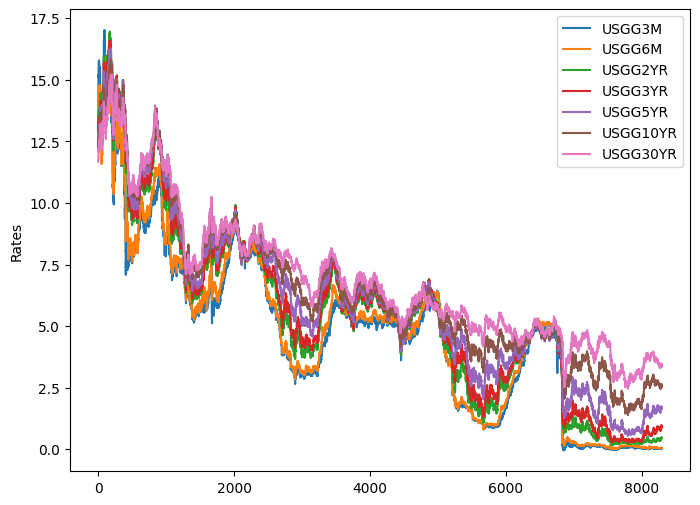

In [4]:
RatesData = pd.DataFrame(RatesData.iloc[:,:7])
RatesData_ranks_matrix = RatesData.rank(pct=True)
plt.plot(range(RatesData.shape[0]), RatesData)
plt.legend(RatesData.columns, loc='best')
plt.ylabel("Rates");

Calculate and visualize the covariance and correlation matrices.


In [5]:
Covariance_Matrix = RatesData.cov()
print(Covariance_Matrix)

             USGG3M     USGG6M    USGG2YR    USGG3YR    USGG5YR   USGG10YR  \
USGG3M    11.760393  11.855287  12.303031  11.942035  11.188856   9.924865   
USGG6M    11.855287  12.000510  12.512434  12.158422  11.406959  10.128890   
USGG2YR   12.303031  12.512434  13.284203  12.977542  12.279514  11.005377   
USGG3YR   11.942035  12.158422  12.977542  12.708647  12.068078  10.856033   
USGG5YR   11.188856  11.406959  12.279514  12.068078  11.543082  10.463386   
USGG10YR   9.924865  10.128890  11.005377  10.856033  10.463386   9.583483   
USGG30YR   8.587987   8.768702   9.600181   9.497246   9.212159   8.510632   

          USGG30YR  
USGG3M    8.587987  
USGG6M    8.768702  
USGG2YR   9.600181  
USGG3YR   9.497246  
USGG5YR   9.212159  
USGG10YR  8.510632  
USGG30YR  7.624304  


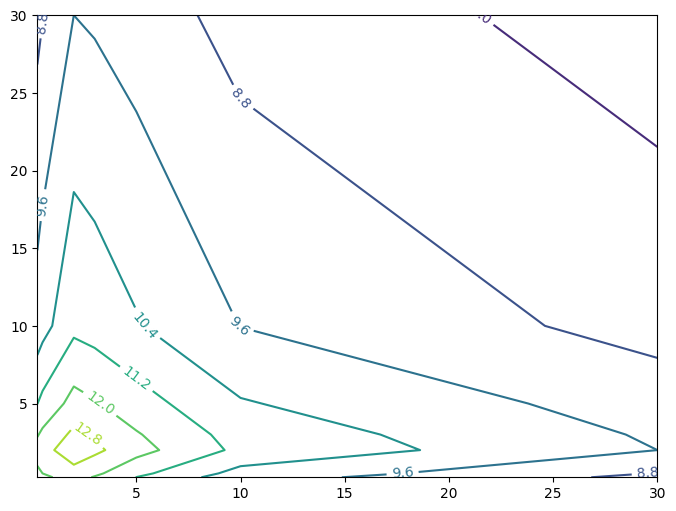

In [6]:
Maturities = [.25, .5, 2, 3, 5, 10, 30]  # in years
plt.contour(Maturities, Maturities, Covariance_Matrix).clabel(inline=1, fontsize=10);

In [7]:
print(RatesData.corr())

            USGG3M    USGG6M   USGG2YR   USGG3YR   USGG5YR  USGG10YR  USGG30YR
USGG3M    1.000000  0.997933  0.984314  0.976827  0.960315  0.934872  0.906944
USGG6M    0.997933  1.000000  0.991001  0.984527  0.969190  0.944496  0.916717
USGG2YR   0.984314  0.991001  1.000000  0.998792  0.991637  0.975384  0.953919
USGG3YR   0.976827  0.984527  0.998792  1.000000  0.996386  0.983694  0.964824
USGG5YR   0.960315  0.969190  0.991637  0.996386  1.000000  0.994832  0.981975
USGG10YR  0.934872  0.944496  0.975384  0.983694  0.994832  1.000000  0.995635
USGG30YR  0.906944  0.916717  0.953919  0.964824  0.981975  0.995635  1.000000


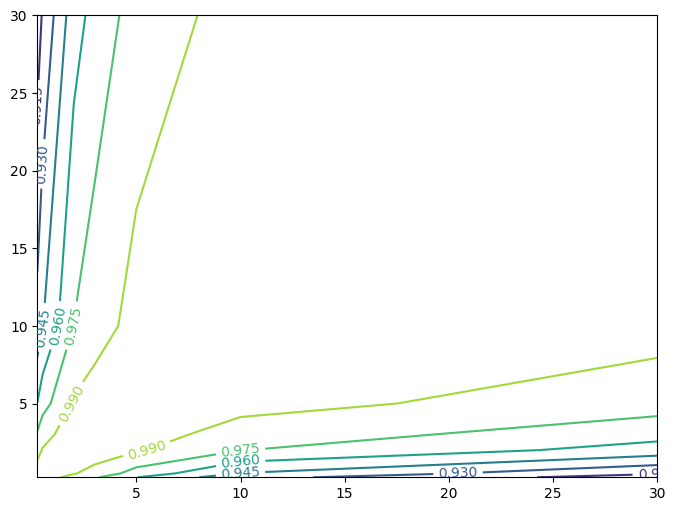

In [8]:
plt.contour(Maturities, Maturities, RatesData.corr()).clabel(inline=1, fontsize=10);

Very high correlation level: good condition for dimensionality reduction by PCA.    

## PCA assumptions

Does the PCA method have any assumptions about the data?

Of course! The method is based on approximation of the covariance matrix.
Thus, it has Gaussian assumption about the data.

Check if this assumption is correct.     

### Check Gaussian assumption for 3M rate


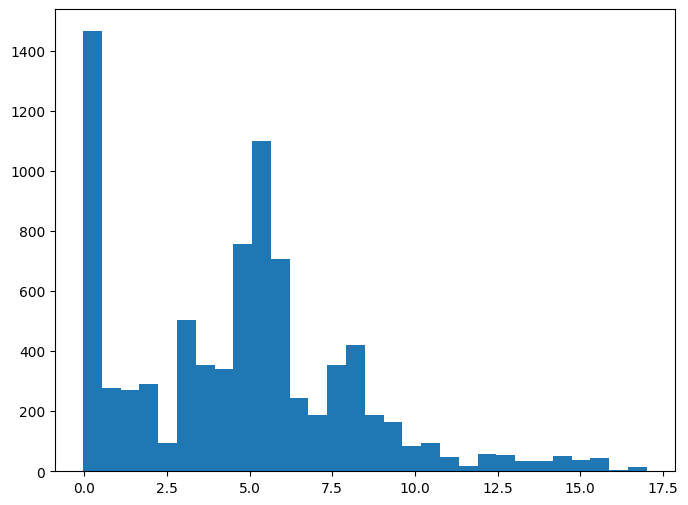

In [9]:
plt.hist(RatesData['USGG3M'], bins=30);

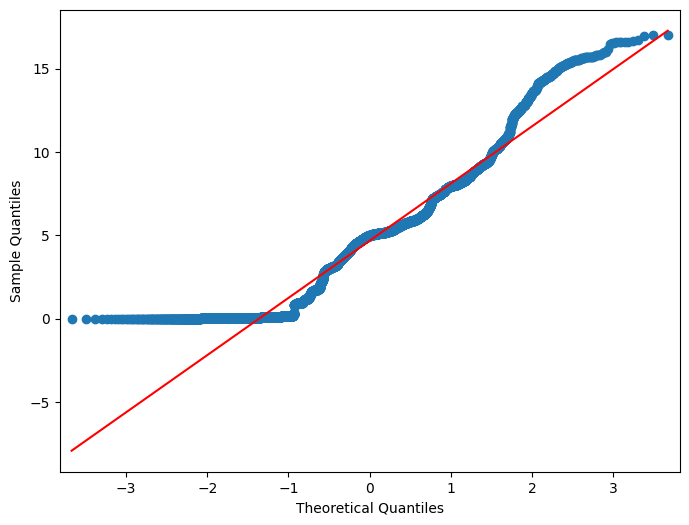

In [11]:
import statsmodels.api as sm

sm.qqplot(RatesData['USGG3M'],line='s');

### Check Gaussian assumption for 5Y rate

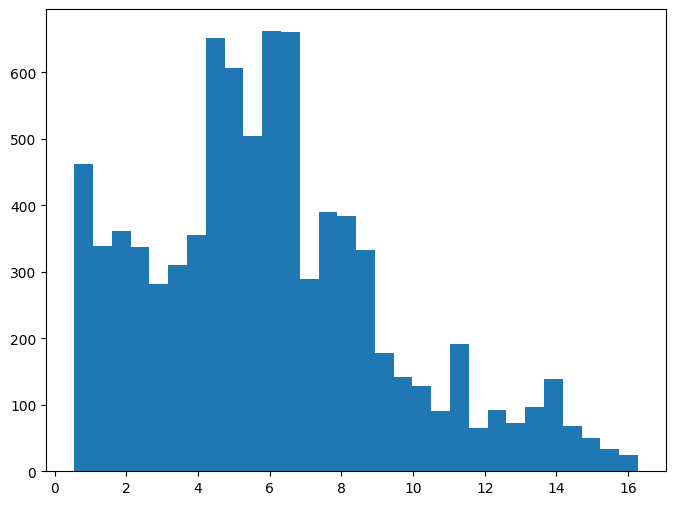

In [12]:
plt.hist(RatesData['USGG5YR'], bins = 30);

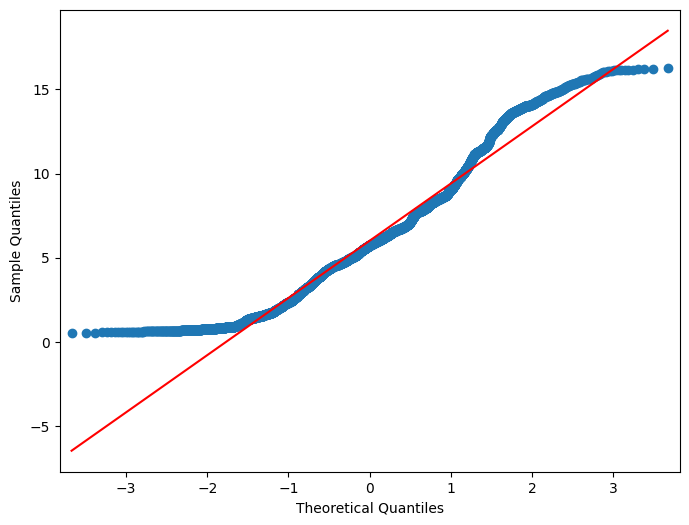

In [13]:
sm.qqplot(RatesData['USGG5YR'], line='s');

### Check Gaussian assumption for 30Y rate

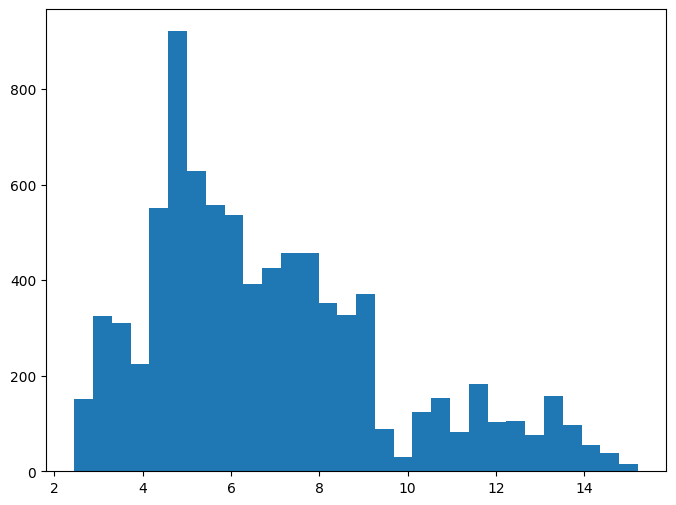

In [14]:
plt.hist(RatesData['USGG30YR'], bins=30);

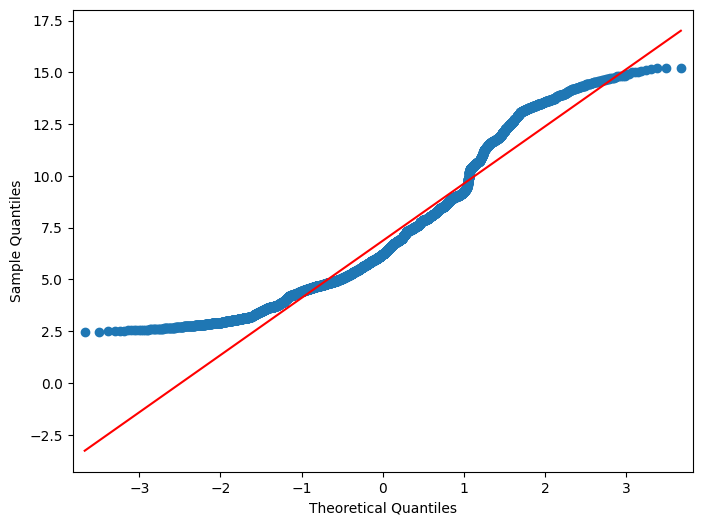

In [14]:
sm.qqplot(RatesData['USGG30YR'], line='s');

Obviously, in all three cases that we checked Gaussian assumption cannot be justified.   
There is no need to check this assumption more accurately using Kolmogorov-Smirnov test.

**Use PCA in order to reduce dimensionality anyway.**

## Apply PCA

This is one of the most classical data sets for PCA.     
The method works great on these data.     


In [15]:
from sklearn.decomposition import PCA

PCA_RatesData = PCA(n_components=7)
PCA_RatesData.fit(RatesData)
PCA_RatesData_summary = pd.DataFrame({'Standard deviation': np.sqrt(PCA_RatesData.explained_variance_),
                               'Proportion of Variance': PCA_RatesData.explained_variance_ratio_,
                               'Cumulative Proportion': np.cumsum(PCA_RatesData.explained_variance_ratio_)},
                               columns=['Standard deviation', 'Proportion of Variance', 'Cumulative Proportion'],
                               index=[ "Comp.%i" %(i+1) for i in range(7)])
print(PCA_RatesData_summary.T)

                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5  \
Standard deviation      8.763814  1.245601  0.349829  0.118976  0.091222   
Proportion of Variance  0.978343  0.019763  0.001559  0.000180  0.000106   
Cumulative Proportion   0.978343  0.998106  0.999665  0.999846  0.999952   

                          Comp.6    Comp.7  
Standard deviation      0.047423  0.039444  
Proportion of Variance  0.000029  0.000020  
Cumulative Proportion   0.999980  1.000000  


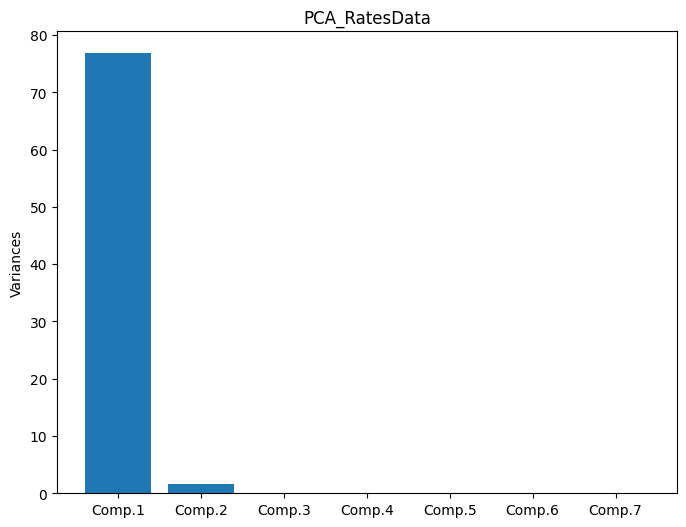

In [16]:
fig, ax = plt.subplots()
x_pos = range(len(PCA_RatesData.explained_variance_))
ax.bar(x_pos, PCA_RatesData.explained_variance_, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(PCA_RatesData_summary.index)
plt.title('PCA_RatesData')
plt.ylabel('Variances');

The plot clearly indicates that 2 components should be enough.    
Make the loadings and factors.   

In [17]:
Loadings_2_factors = pd.DataFrame(PCA_RatesData.components_[:2],
                                  columns= RatesData.columns,
                                  index=["Comp.%i"%(i+1) for i in range(2)])
print(Loadings_2_factors.T)

            Comp.1    Comp.2
USGG3M    0.383961  0.507445
USGG6M    0.390187  0.439461
USGG2YR   0.415185  0.111127
USGG3YR   0.406354 -0.016970
USGG5YR   0.386061 -0.231403
USGG10YR  0.347754 -0.432460
USGG30YR  0.304712 -0.544212


In [18]:
Factors_2_factors = pd.DataFrame(PCA_RatesData.fit_transform(RatesData)[:,:2],
                                 columns =["Comp.%i"%(i+1) for i in range(2)],
                                 index=RatesData.index)
print(Factors_2_factors.iloc[:6])

              Comp.1    Comp.2
Date                          
1/5/1981   18.015526  2.240277
1/6/1981   18.091398  2.352346
1/7/1981   19.447314  2.862932
1/8/1981   19.748510  3.040712
1/9/1981   20.572042  3.177974
1/12/1981  20.142185  3.241569


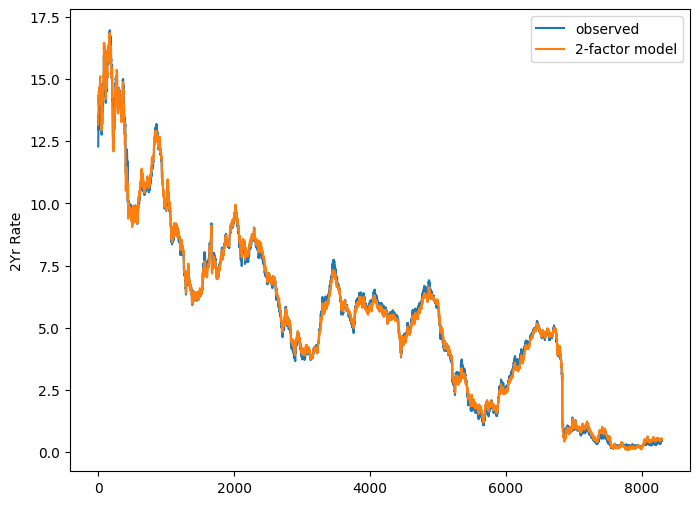

In [19]:
Model_Matrix_2_factors = np.dot(Factors_2_factors, Loadings_2_factors) + PCA_RatesData.mean_
plt.plot(range(RatesData.shape[0]), RatesData['USGG2YR'])
plt.plot(range(RatesData.shape[0]), Model_Matrix_2_factors[:,2])
plt.legend(['observed', '2-factor model'], loc='best')
plt.ylabel("2Yr Rate");

The model based on 2 factors seems to give a very good approximation of the history since 1981.      

Compare the covariance matrix of rates with the model covariance matrix.



In [20]:
pdModel_Matrix_2_factors = pd.DataFrame(Model_Matrix_2_factors, columns = RatesData.columns)
print(pdModel_Matrix_2_factors.cov())

             USGG3M     USGG6M    USGG2YR    USGG3YR    USGG5YR   USGG10YR  \
USGG3M    11.722487  11.852568  12.331258  11.969983  11.202713   9.914762   
USGG6M    11.852568  11.992797  12.518073  12.166087  11.411731  10.126670   
USGG2YR   12.331258  12.518073  13.258604  12.954917  12.270835  11.014648   
USGG3YR   11.969983  12.166087  12.954917  12.682679  12.054978  10.864732   
USGG5YR   11.202713  11.411731  12.270835  12.054978  11.530249  10.466598   
USGG10YR   9.914762  10.126670  11.014648  10.864732  10.466598   9.578368   
USGG30YR   8.557474   8.760587   9.622855   9.524343   9.230474   8.503739   

          USGG30YR  
USGG3M    8.557474  
USGG6M    8.760587  
USGG2YR   9.622855  
USGG3YR   9.524343  
USGG5YR   9.230474  
USGG10YR  8.503739  
USGG30YR  7.590775  


In [21]:
print(Covariance_Matrix)

             USGG3M     USGG6M    USGG2YR    USGG3YR    USGG5YR   USGG10YR  \
USGG3M    11.760393  11.855287  12.303031  11.942035  11.188856   9.924865   
USGG6M    11.855287  12.000510  12.512434  12.158422  11.406959  10.128890   
USGG2YR   12.303031  12.512434  13.284203  12.977542  12.279514  11.005377   
USGG3YR   11.942035  12.158422  12.977542  12.708647  12.068078  10.856033   
USGG5YR   11.188856  11.406959  12.279514  12.068078  11.543082  10.463386   
USGG10YR   9.924865  10.128890  11.005377  10.856033  10.463386   9.583483   
USGG30YR   8.587987   8.768702   9.600181   9.497246   9.212159   8.510632   

          USGG30YR  
USGG3M    8.587987  
USGG6M    8.768702  
USGG2YR   9.600181  
USGG3YR   9.497246  
USGG5YR   9.212159  
USGG10YR  8.510632  
USGG30YR  7.624304  


**Approximation is close to perfect!**

Observe and interpret the loadings.


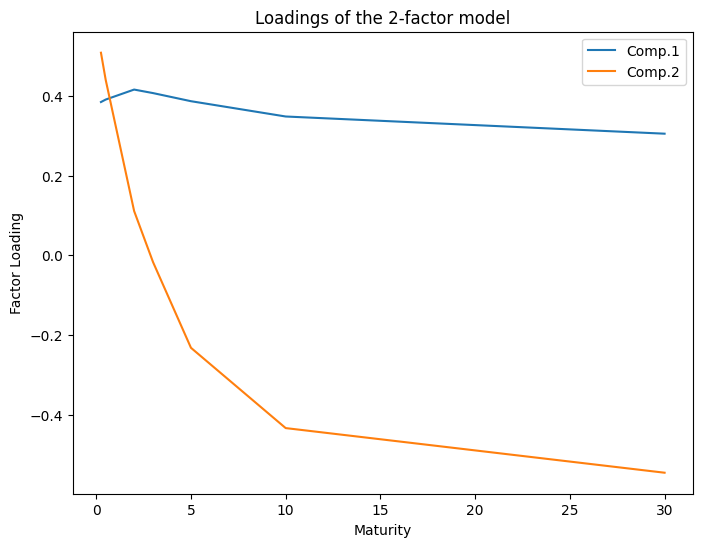

In [22]:
plt.plot(Maturities, Loadings_2_factors.T)
plt.legend(Loadings_2_factors.index, loc='best')
plt.title("Loadings of the 2-factor model")
plt.xlabel("Maturity")
plt.ylabel("Factor Loading");

Explore factors.

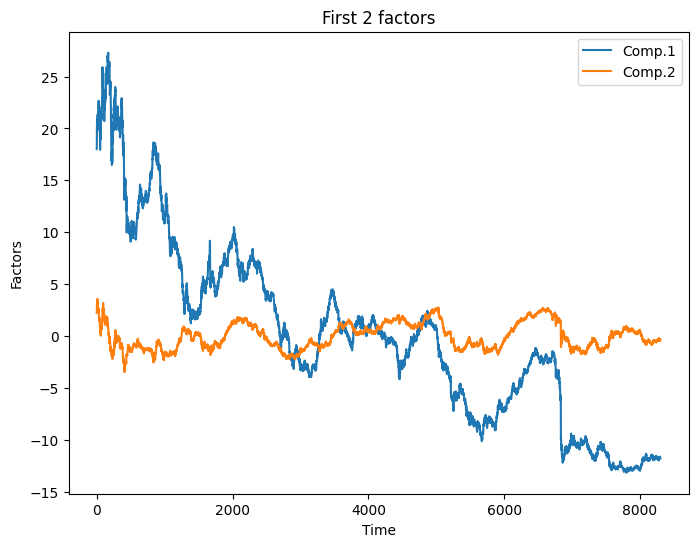

In [23]:
plt.plot(range(Factors_2_factors.shape[0]), Factors_2_factors)
plt.legend(Factors_2_factors.columns, loc='best')
plt.title("First 2 factors")
plt.xlabel("Time")
plt.ylabel("Factors");

Are factors uncorrelated?

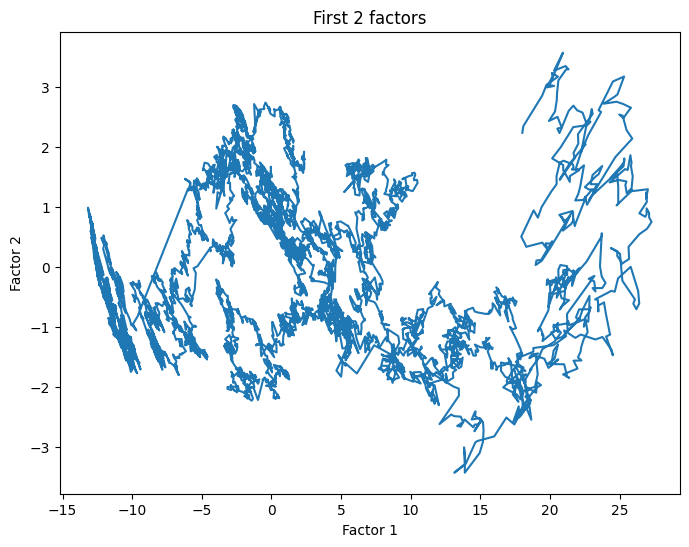

In [24]:
plt.plot(Factors_2_factors.iloc[:,0],Factors_2_factors.iloc[:,1])
plt.title("First 2 factors")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2");

Clearly, correlation has periods of persistent values different from zero, they have different not only magnitude, but also sign.      
The value and the sign of factor correlations can be interpreted.     
But formally the correlation matrix is:     


In [25]:
print(Factors_2_factors.corr())

              Comp.1        Comp.2
Comp.1  1.000000e+00 -3.320559e-16
Comp.2 -3.320559e-16  1.000000e+00


How can you interpret this fact?      

Are factors independent?    
Check the empirical copula

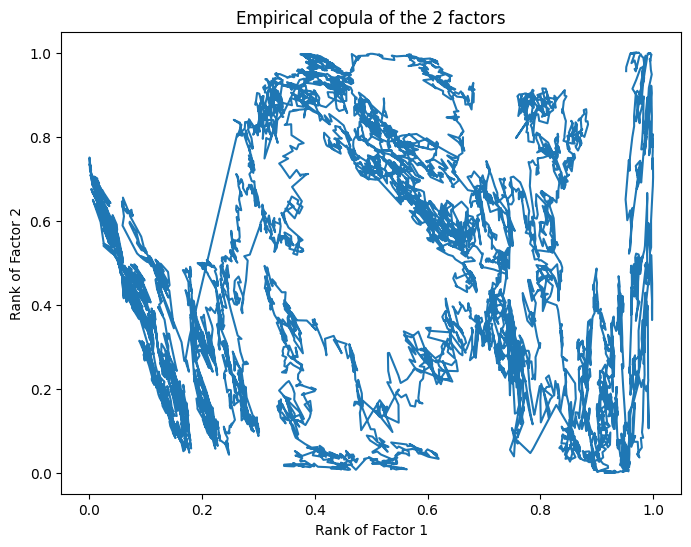

In [26]:
f2_ranked = Factors_2_factors.rank(pct=True)
plt.plot(f2_ranked.iloc[:,0], f2_ranked.iloc[:,1])
plt.title("Empirical copula of the 2 factors")
plt.xlabel("Rank of Factor 1")
plt.ylabel("Rank of Factor 2");

We see again long periods of persistent non-linear dependence.    
Note similarity between the empirical copula and the X-Y plot of the two factors.     

Create matrix of residuals.     
Calculate descriptive statistics.      
Visualize them.

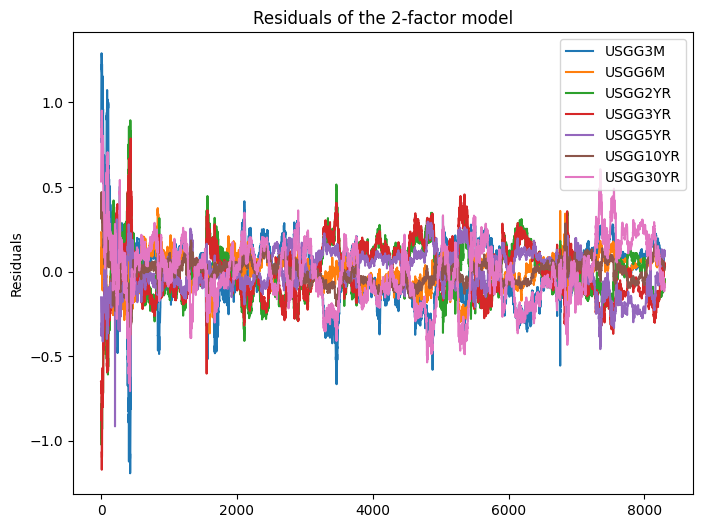

In [27]:
ResidualMatrix_2_factors = RatesData - Model_Matrix_2_factors
plt.plot(range(ResidualMatrix_2_factors.shape[0]), ResidualMatrix_2_factors)
plt.legend(ResidualMatrix_2_factors.columns, loc='upper right')
plt.title("Residuals of the 2-factor model")
plt.ylabel("Residuals");

In [28]:
print(ResidualMatrix_2_factors.describe())

             USGG3M        USGG6M       USGG2YR       USGG3YR       USGG5YR  \
count  8.300000e+03  8.300000e+03  8.300000e+03  8.300000e+03  8.300000e+03   
mean  -2.762984e-16 -4.747533e-16  1.157842e-16  6.379903e-16  5.316229e-16   
std    1.946948e-01  8.782076e-02  1.599952e-01  1.611461e-01  1.132843e-01   
min   -1.191311e+00 -4.857537e-01 -1.024311e+00 -1.170278e+00 -9.140943e-01   
25%   -1.116932e-01 -5.448356e-02 -1.133538e-01 -1.059514e-01 -6.453203e-02   
50%    1.831643e-02  6.268068e-03 -1.075796e-02 -1.281901e-02  4.685914e-03   
75%    1.135721e-01  5.798089e-02  1.073811e-01  1.055931e-01  8.238046e-02   
max    1.289705e+00  3.752270e-01  8.939158e-01  7.865621e-01  3.090551e-01   

           USGG10YR      USGG30YR  
count  8.300000e+03  8.300000e+03  
mean   1.767796e-16 -9.530797e-16  
std    7.151639e-02  1.831093e-01  
min   -3.715675e-01 -7.057432e-01  
25%   -5.288863e-02 -1.148798e-01  
50%    7.016170e-03 -4.552568e-04  
75%    4.667160e-02  1.276536e-01  


Note that residuals contain a lot less variability and pattern than the original data.     
This means that the PCA model was able to explain a lot of information contained in the data.    

But are there any patterns left in the residuals after  PCA model?    

If no, residuals should be just i.i.d. noise.    
And it better be Gaussian.     

Before we check correlations distributions and empirical copulas, note that there is at least one pattern in residuals: they tend to spike in the opposite directions.     
This will probably result in counter-monotonic dependency. And it will likely be concentrated in the tails.

Also note that even in low-rate low-volatility environment residuals can be above 50 basis points in absolute value and stay at that level for some time.
Although, the mean values for all maturities are zeros, medians are around or less than one basis point (0.01 of one percentage point), the first and the third quarantines deviate from zero by 10 basis points in different directions.      
All these signs may be telling us that the residuals may behave quite irregular while remaining very small on average.

## Explore residuals further

### Residuals for 3M rates


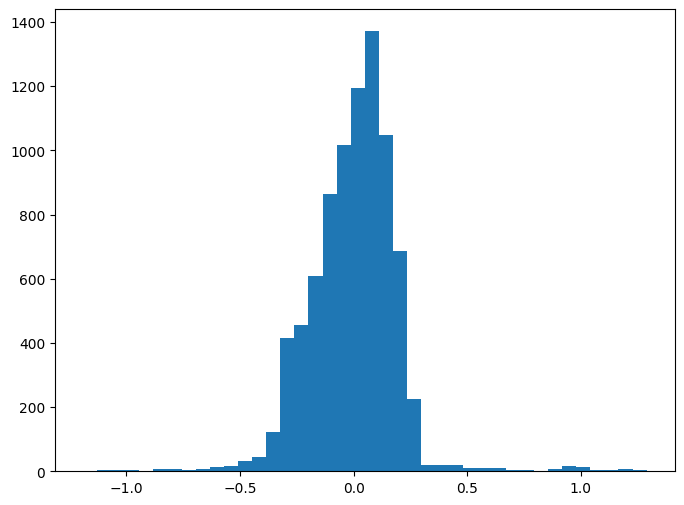

In [29]:
plt.hist(ResidualMatrix_2_factors['USGG3M'], bins=40);

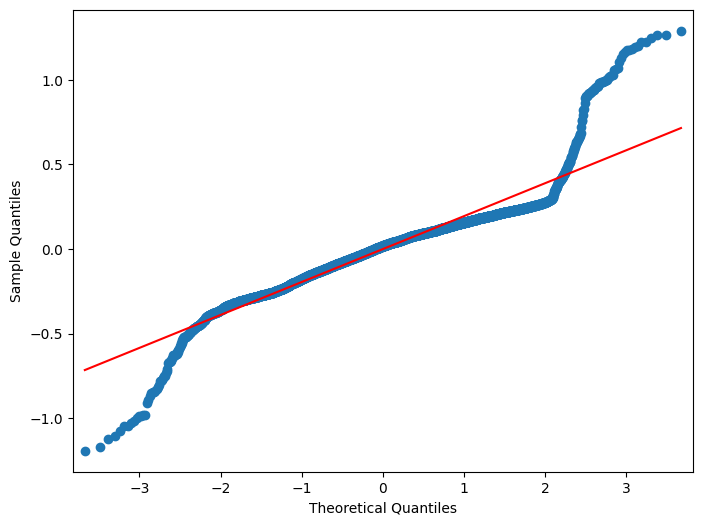

In [30]:
sm.qqplot(ResidualMatrix_2_factors['USGG3M'], line='s');

### Residuals for 5Y rates

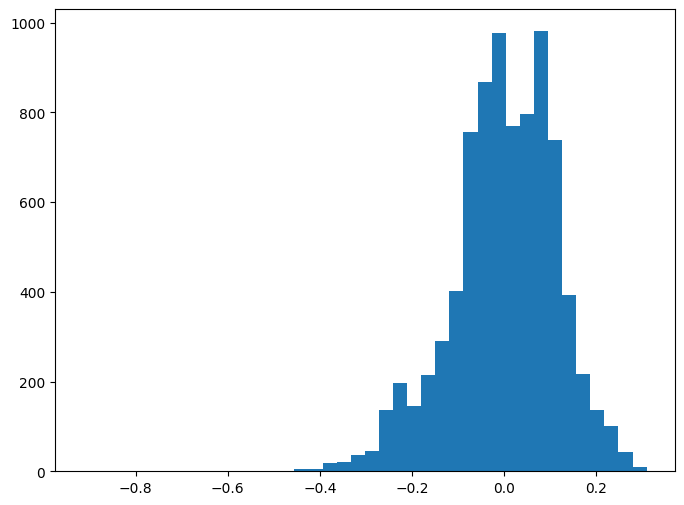

In [31]:
plt.hist(ResidualMatrix_2_factors['USGG5YR'], bins=40);

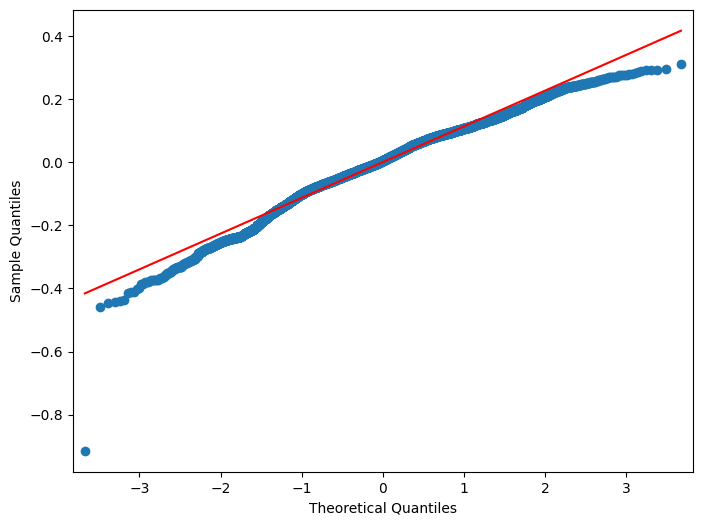

In [32]:
sm.qqplot(ResidualMatrix_2_factors['USGG5YR'], line='s');

### Residuals for 30Y rates

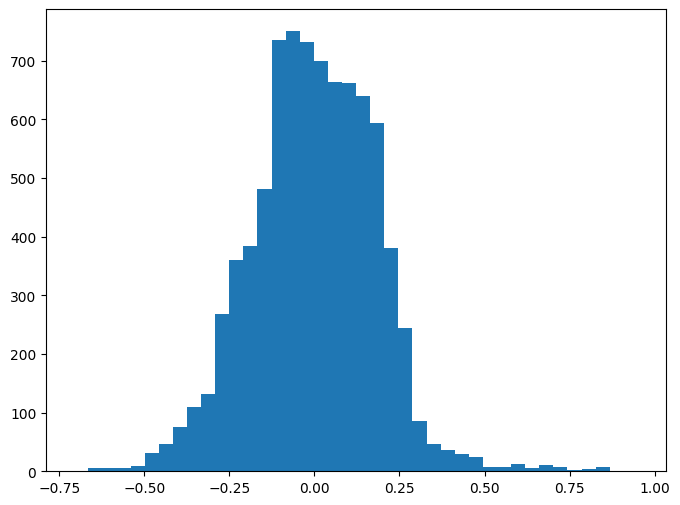

In [33]:
plt.hist(ResidualMatrix_2_factors['USGG30YR'], bins=40);

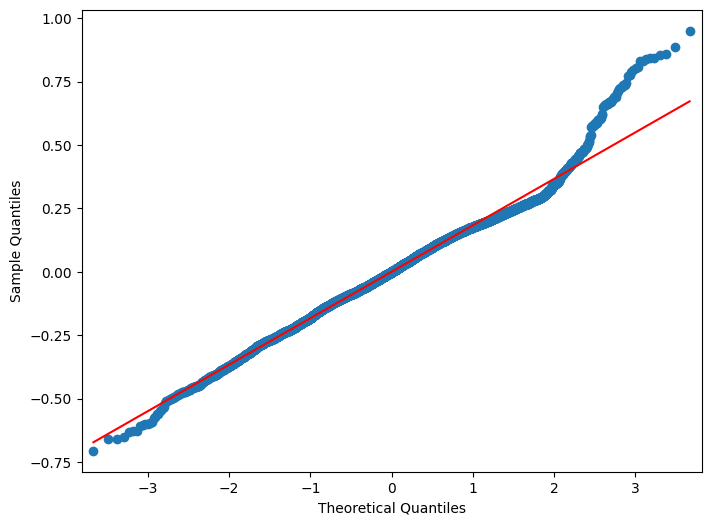

In [34]:
sm.qqplot(ResidualMatrix_2_factors['USGG30YR'], line='s');

Correlation matrix of the residuals:

In [36]:
print(ResidualMatrix_2_factors.corr())

            USGG3M    USGG6M   USGG2YR   USGG3YR   USGG5YR  USGG10YR  USGG30YR
USGG3M    1.000000  0.159015 -0.906175 -0.890773 -0.628292  0.725576  0.855872
USGG6M    0.159015  1.000000 -0.401332 -0.541612 -0.479686  0.353565  0.504656
USGG2YR  -0.906175 -0.401332  1.000000  0.877517  0.478820 -0.810325 -0.773970
USGG3YR  -0.890773 -0.541612  0.877517  1.000000  0.717597 -0.754794 -0.918293
USGG5YR  -0.628292 -0.479686  0.478820  0.717597  1.000000 -0.396528 -0.882946
USGG10YR  0.725576  0.353565 -0.810325 -0.754794 -0.396528  1.000000  0.526376
USGG30YR  0.855872  0.504656 -0.773970 -0.918293 -0.882946  0.526376  1.000000


**Conclusions.**     
1. We see that the residuals have become significantly more regular. They look like a sample from a single distribution.     
2. At the same time the distributions for different rates show leptokurtic shape.       
3. We observed before that the 2-factor model approximates the covariance matrix very well. Yet residuals have significant  patterns left in them and their distributions are significantly different from Gaussian.      
We will probably find more patterns of the type that cannot be captured by covariance/correlation structure.            
**It is going to be non-linear dependency.**

### Non-linear dependency of residuals

Create ranks of residuals.      
Compare empirical copulas of different pairs of residuals.       


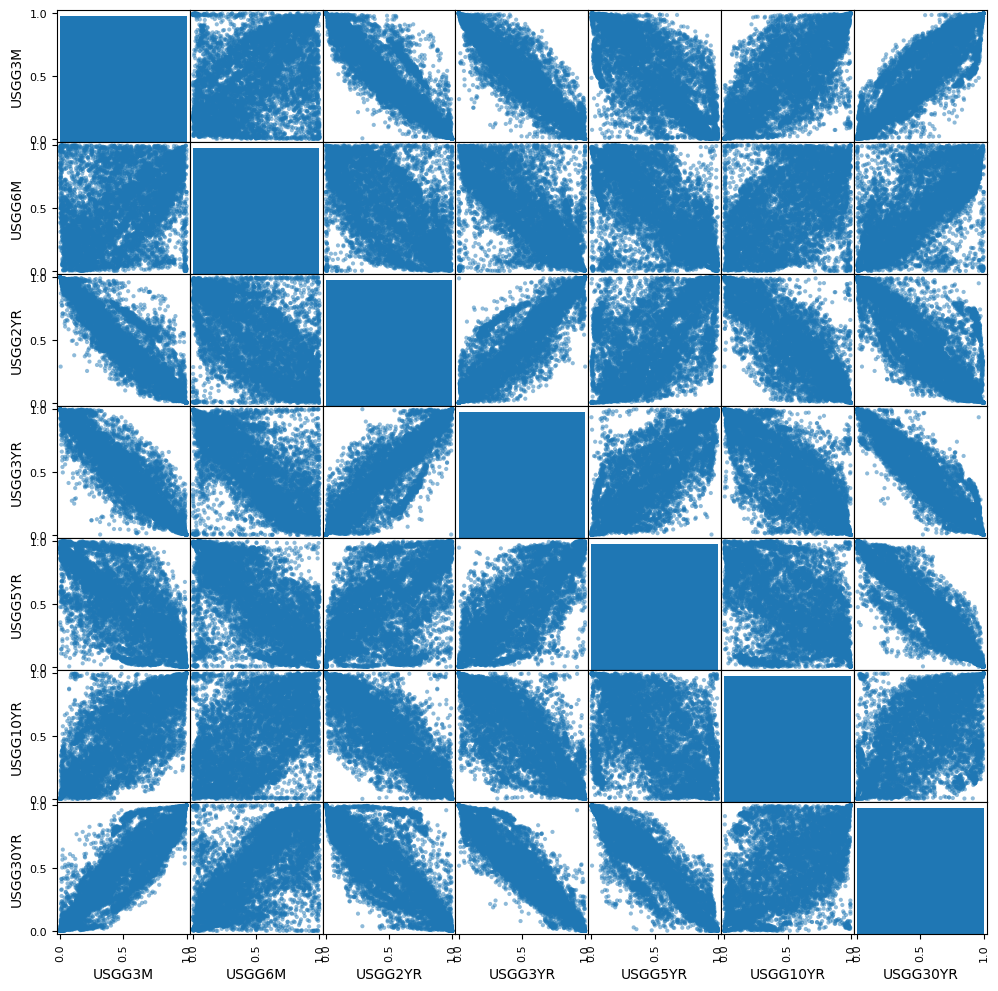

In [37]:
Residual_2_ranks_matrix = ResidualMatrix_2_factors.rank(pct=True)
pairs = pd.plotting.scatter_matrix(Residual_2_ranks_matrix, figsize=(12,12))

We observe strong co-monotonic and counter-monotonic dependencies.    
We will need to explore them further.      

Look at the case of dependency of 6M and 2Y rates.       

Empirical copula and X-Y plot of the two rates are shown below. 

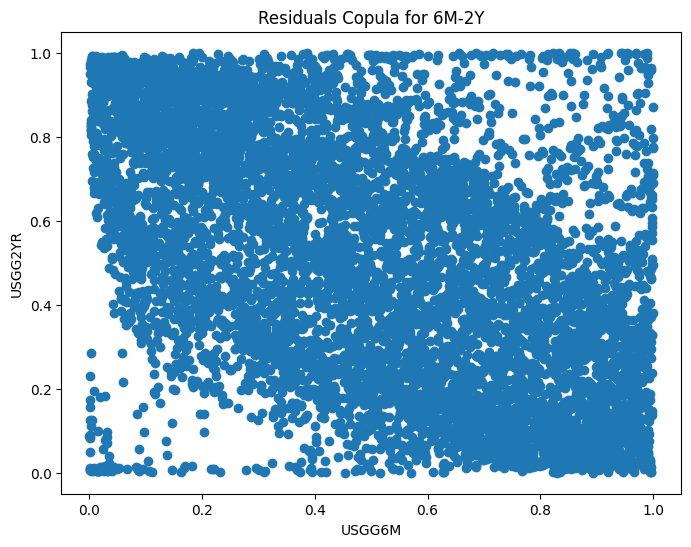

In [38]:
# 6-month vs. 2-year empirical copula: rates and residuals
plt.plot(Residual_2_ranks_matrix['USGG6M'], Residual_2_ranks_matrix['USGG2YR'],'o')
plt.title("Residuals Copula for 6M-2Y")
plt.xlabel('USGG6M')
plt.ylabel('USGG2YR');

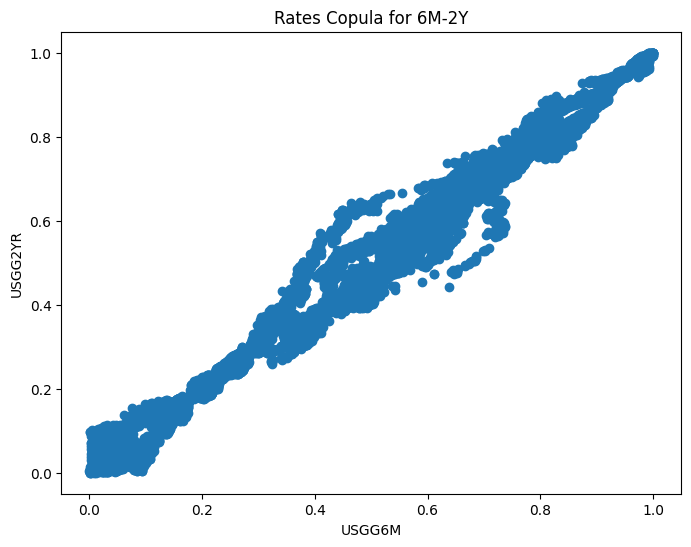

In [39]:
plt.plot(RatesData_ranks_matrix['USGG6M'],RatesData_ranks_matrix['USGG2YR'],'o')
plt.title("Rates Copula for 6M-2Y")
plt.xlabel('USGG6M')
plt.ylabel('USGG2YR');

Illustration of counter-monotonic dependency between the two rates.

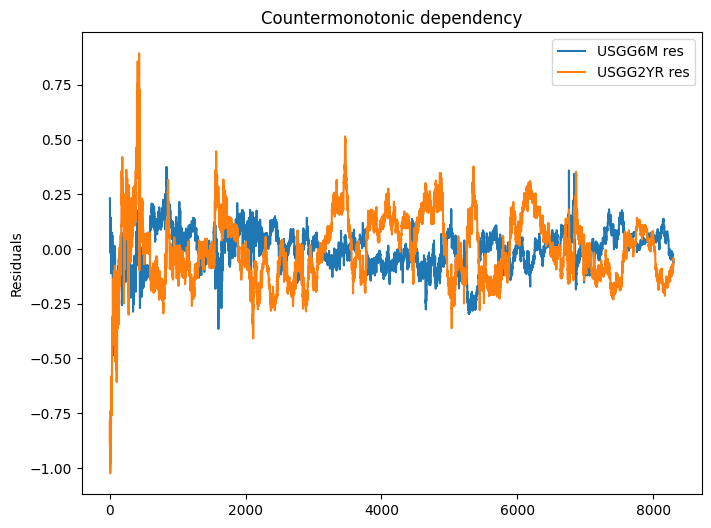

In [40]:
plt.plot(range(ResidualMatrix_2_factors.shape[0]), ResidualMatrix_2_factors['USGG6M'])
plt.plot(range(ResidualMatrix_2_factors.shape[0]), ResidualMatrix_2_factors['USGG2YR'])
plt.legend(['USGG6M res', 'USGG2YR res'])
plt.title("Countermonotonic dependency")
plt.ylabel("Residuals");

**Conclusions.**      
1. The two rates have strong positive correlation.     
2. The residuals of the 2-factor model for the two rates have low remaining covariance and correlation.     
3. But, empirical copula shows strong non-linear counter-monotonic dependency between the two uncorrelated residuals.     
4. This dependency was magnified by the PCA model.     
5. The non-linear dependency between the residuals is the price for the success in reducing the dimensionality.      


In [41]:
# Original covariance and correlation
print("Covariance  ", Covariance_Matrix.iloc[1,2])
print("Correlation ", RatesData.corr().iloc[1,2])

Covariance   12.512434398272978
Correlation  0.9910012825520907


In [42]:
# Covariance and Correlation of residuals
print("Covariance  ", ResidualMatrix_2_factors.cov().iloc[1,2])
print("Correlation ", ResidualMatrix_2_factors.corr().iloc[1,2])

Covariance   -0.005639076311773314
Correlation  -0.40133196115683806


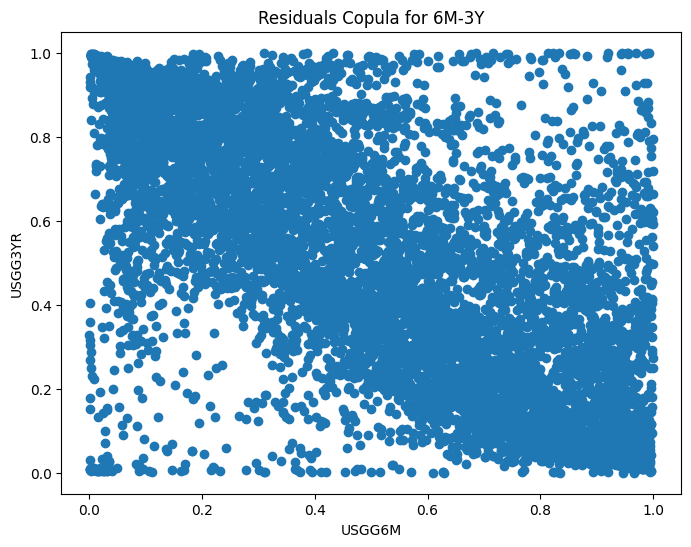

In [43]:
def plot_pair(X, i, j, s):
    plt.plot(X.iloc[:,i], X.iloc[:,j], 'o')
    plt.title(s)
    plt.xlabel(X.columns[i])
    plt.ylabel(X.columns[j]);
    
plot_pair(Residual_2_ranks_matrix, 1, 3, "Residuals Copula for 6M-3Y")

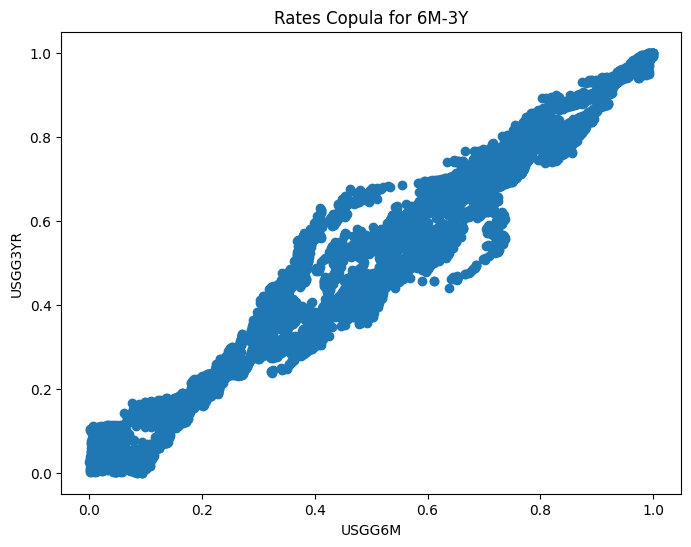

In [44]:
plot_pair(RatesData_ranks_matrix, 1, 3, "Rates Copula for 6M-3Y")

The rest of the pairs of plots show empirical copulas for the rates and for the corresponding residuals.
It would be great to put them in a shiny app.

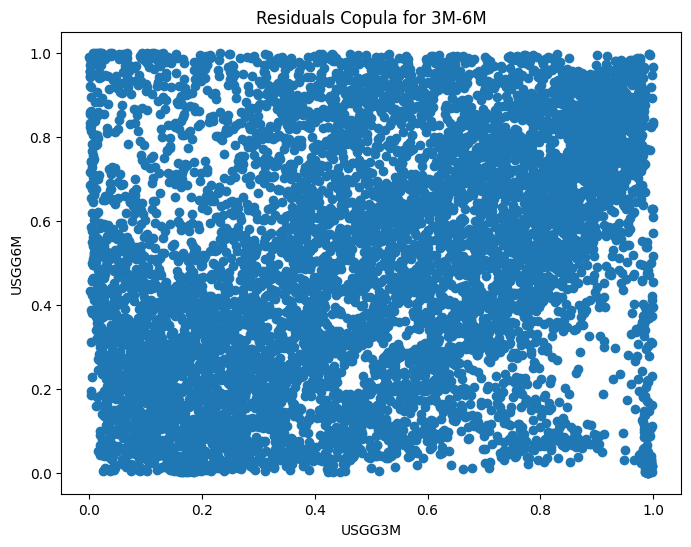

In [45]:
plot_pair(Residual_2_ranks_matrix, 0, 1, "Residuals Copula for 3M-6M")

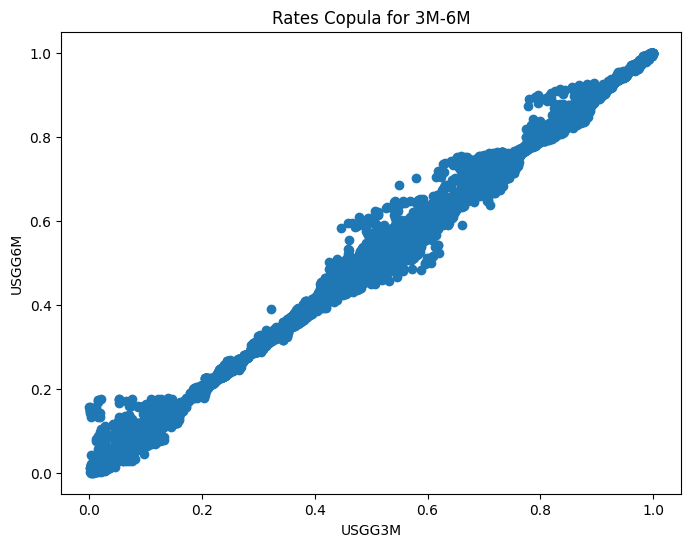

In [46]:
plot_pair(RatesData_ranks_matrix, 0, 1,"Rates Copula for 3M-6M")

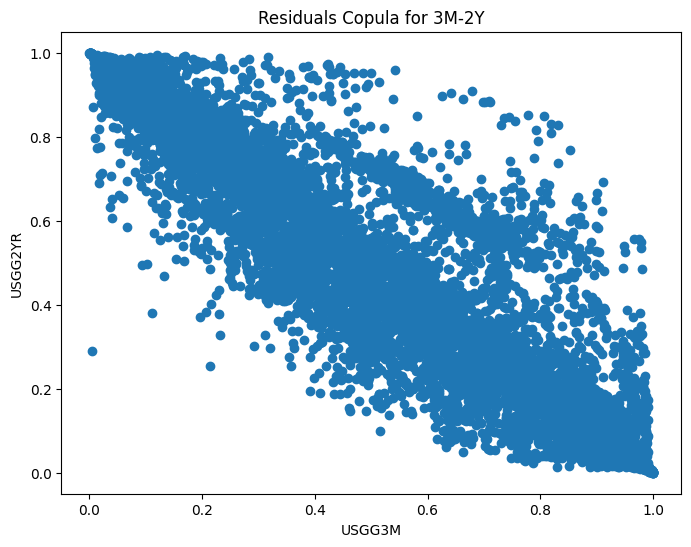

In [47]:
plot_pair(Residual_2_ranks_matrix, 0, 2,"Residuals Copula for 3M-2Y")

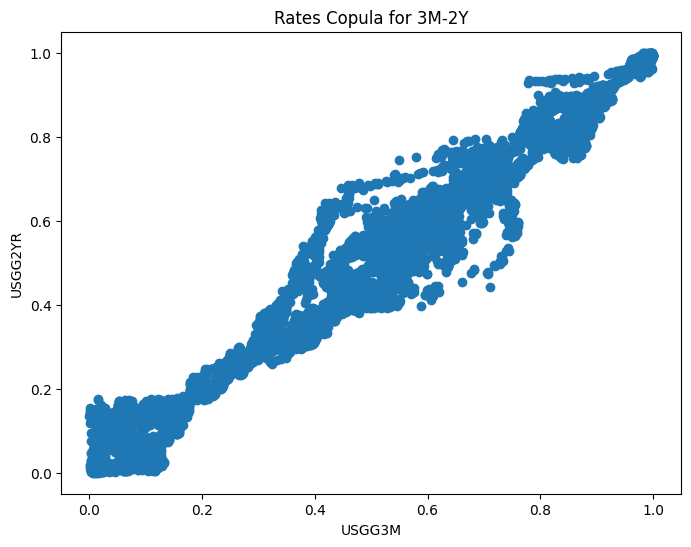

In [48]:
plot_pair(RatesData_ranks_matrix, 0, 2, "Rates Copula for 3M-2Y")

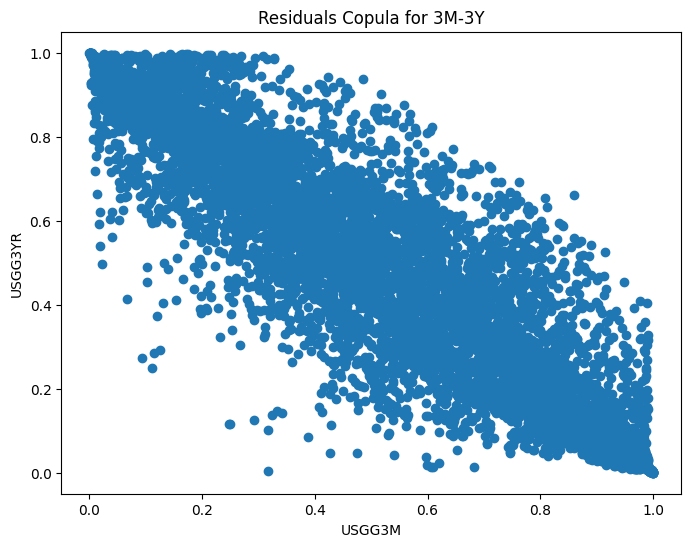

In [49]:
plot_pair(Residual_2_ranks_matrix, 0, 3, "Residuals Copula for 3M-3Y")

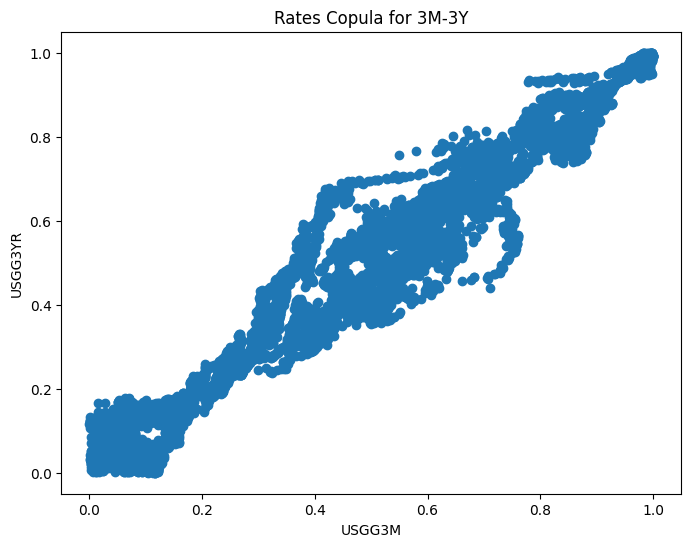

In [50]:
plot_pair(RatesData_ranks_matrix, 0, 3, "Rates Copula for 3M-3Y")

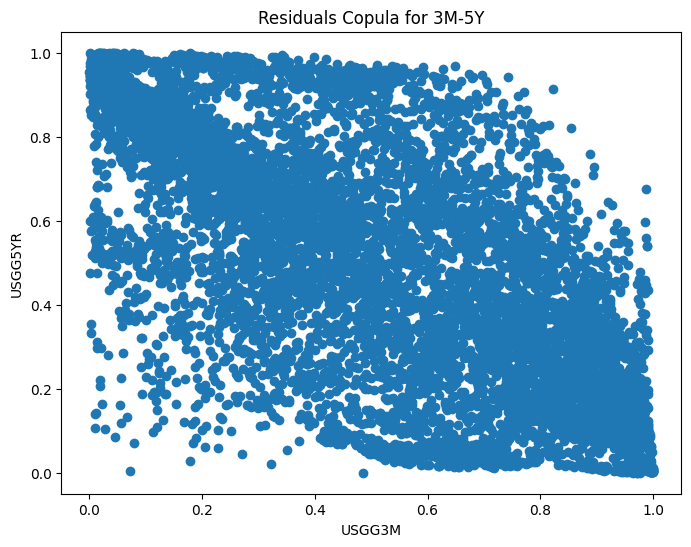

In [51]:
plot_pair(Residual_2_ranks_matrix, 0, 4, "Residuals Copula for 3M-5Y")

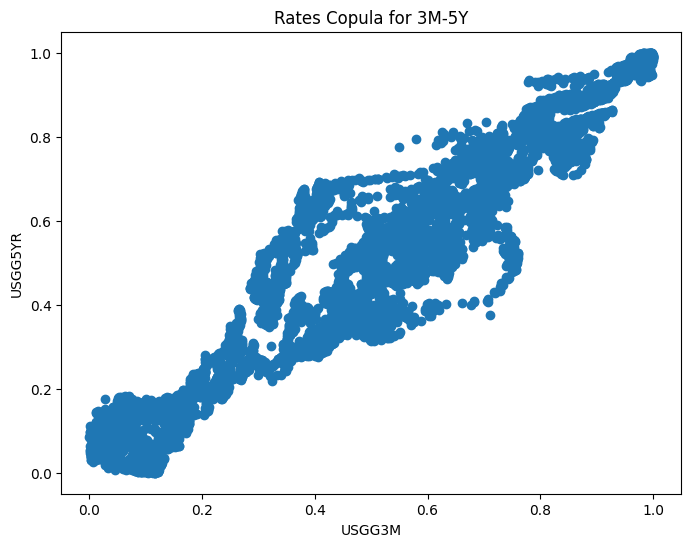

In [52]:
plot_pair(RatesData_ranks_matrix, 0, 4, "Rates Copula for 3M-5Y")

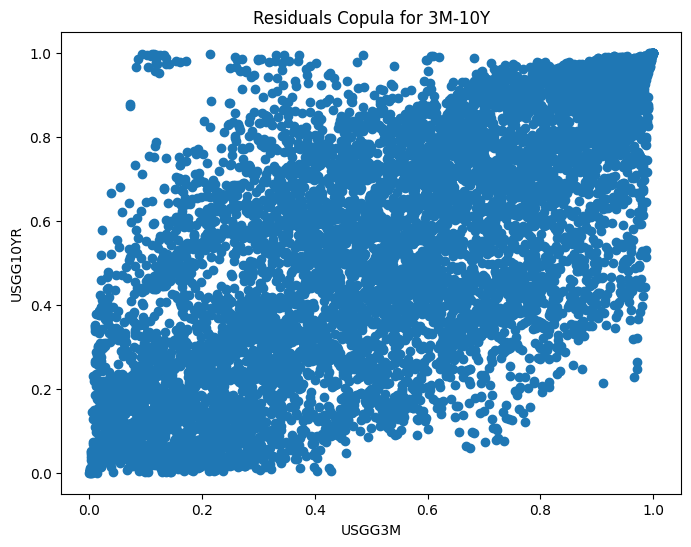

In [53]:
plot_pair(Residual_2_ranks_matrix, 0, 5, "Residuals Copula for 3M-10Y")

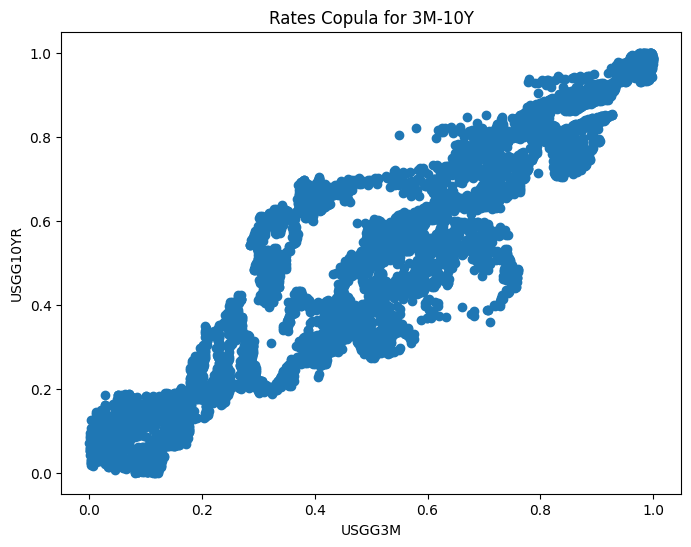

In [54]:
plot_pair(RatesData_ranks_matrix, 0, 5, "Rates Copula for 3M-10Y")

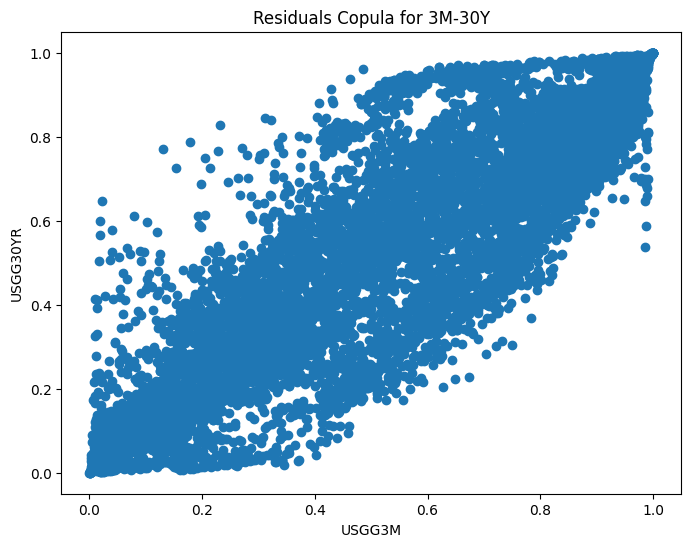

In [55]:
plot_pair(Residual_2_ranks_matrix, 0, 6, "Residuals Copula for 3M-30Y")

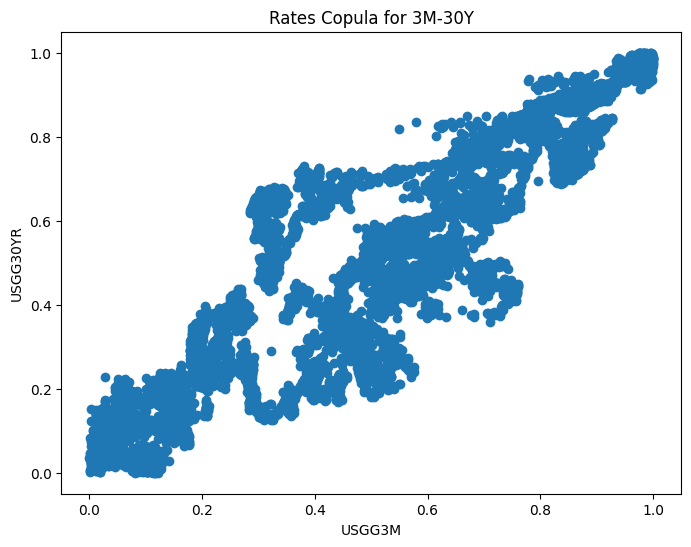

In [56]:
plot_pair(RatesData_ranks_matrix, 0, 6, "Rates Copula for 3M-30Y")

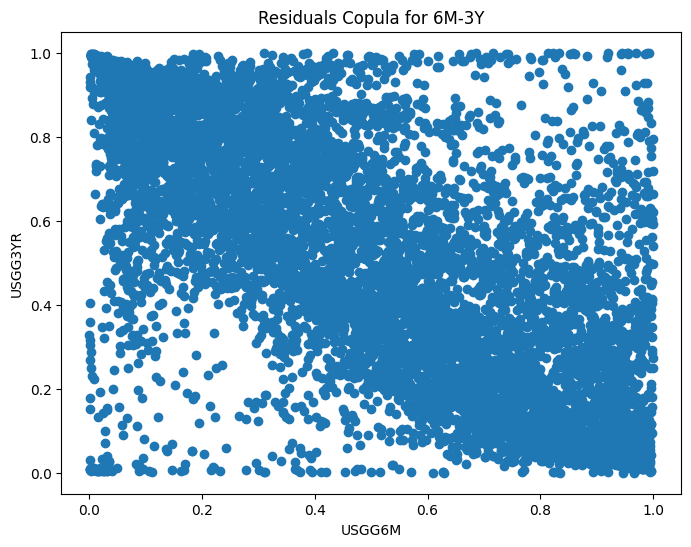

In [57]:
plot_pair(Residual_2_ranks_matrix, 1, 3, "Residuals Copula for 6M-3Y")

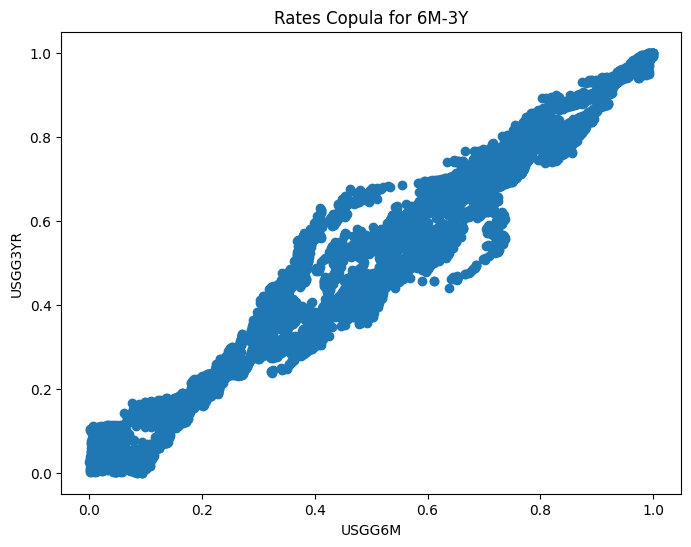

In [58]:
plot_pair(RatesData_ranks_matrix, 1, 3, "Rates Copula for 6M-3Y")

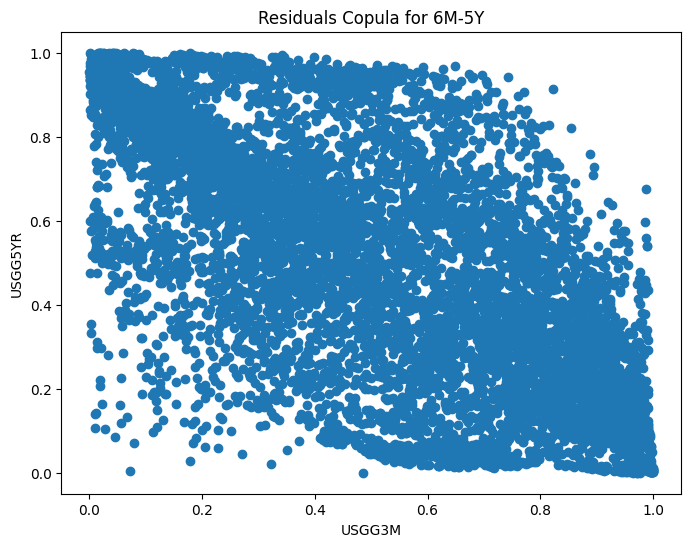

In [59]:
plot_pair(Residual_2_ranks_matrix, 0, 4, "Residuals Copula for 6M-5Y")

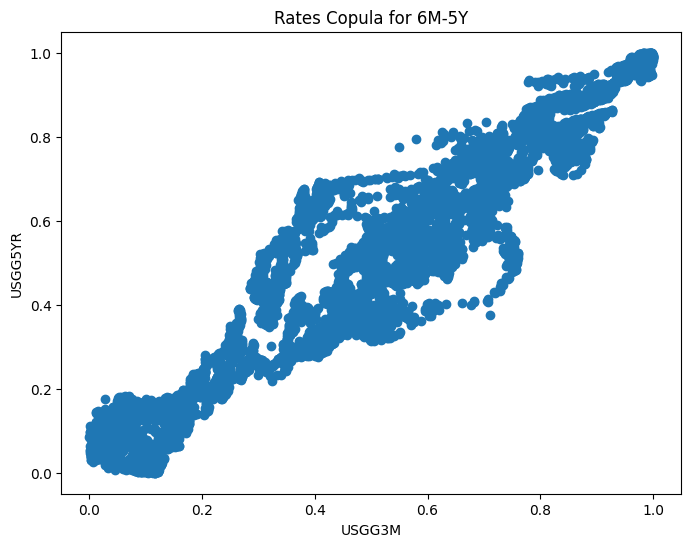

In [60]:
plot_pair(RatesData_ranks_matrix, 0, 4, "Rates Copula for 6M-5Y")

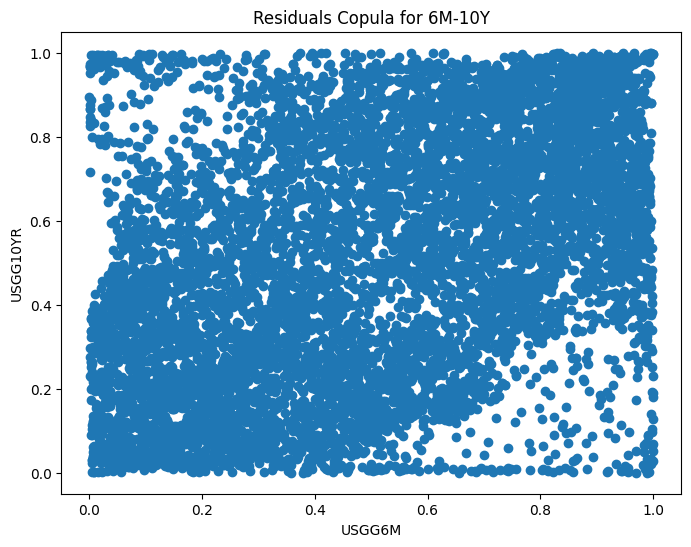

In [61]:
plot_pair(Residual_2_ranks_matrix, 1, 5,"Residuals Copula for 6M-10Y")

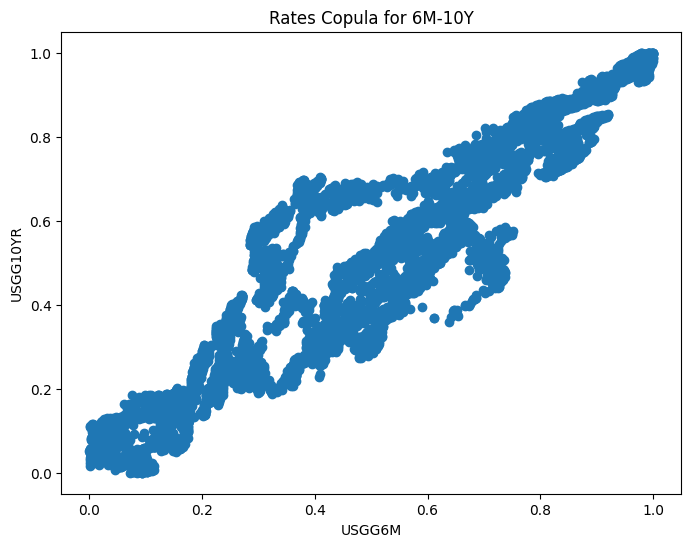

In [62]:
plot_pair(RatesData_ranks_matrix, 1, 5, "Rates Copula for 6M-10Y")

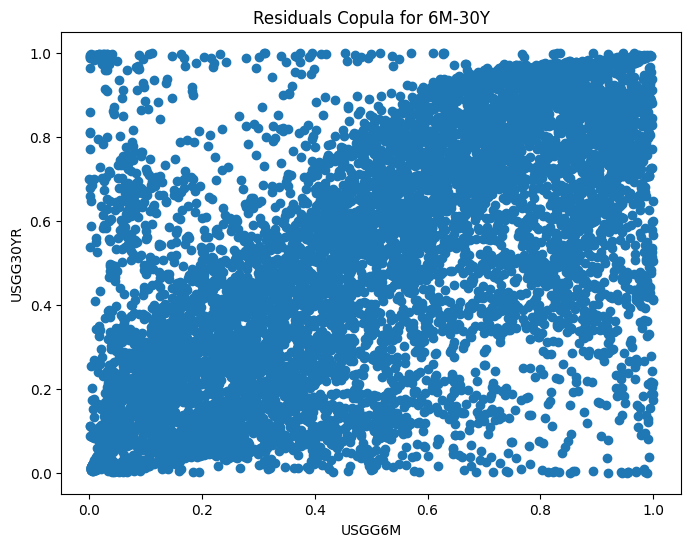

In [63]:
plot_pair(Residual_2_ranks_matrix, 1, 6, "Residuals Copula for 6M-30Y")

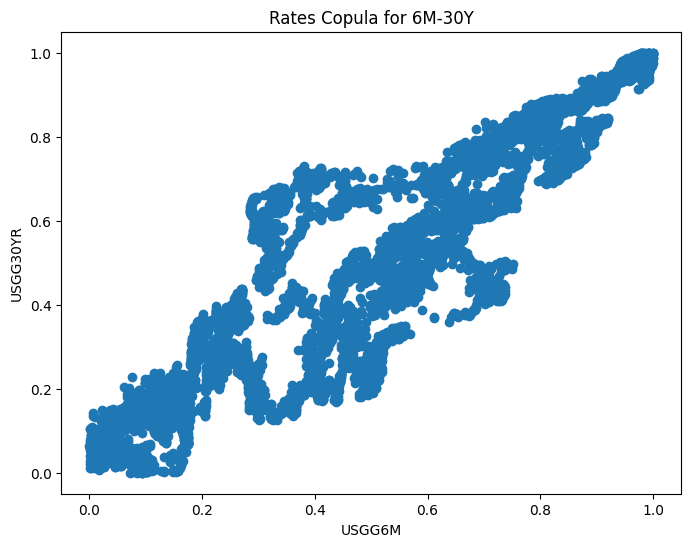

In [64]:
plot_pair(RatesData_ranks_matrix, 1, 6, "Rates Copula for 6M-30Y")

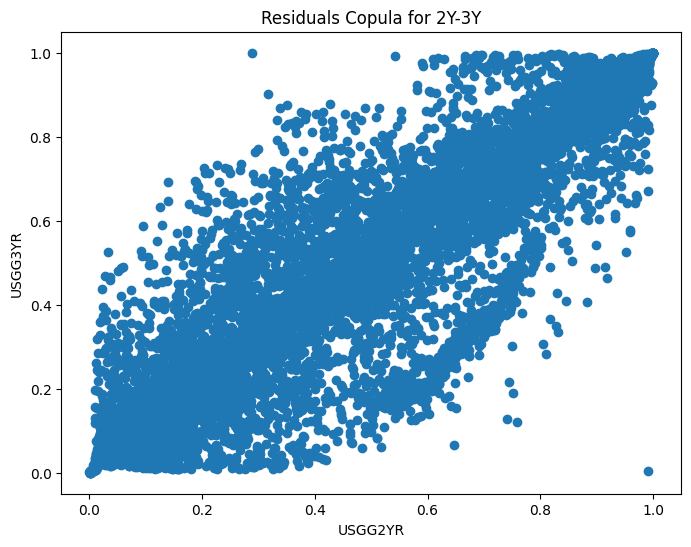

In [65]:
plot_pair(Residual_2_ranks_matrix, 2, 3, "Residuals Copula for 2Y-3Y")

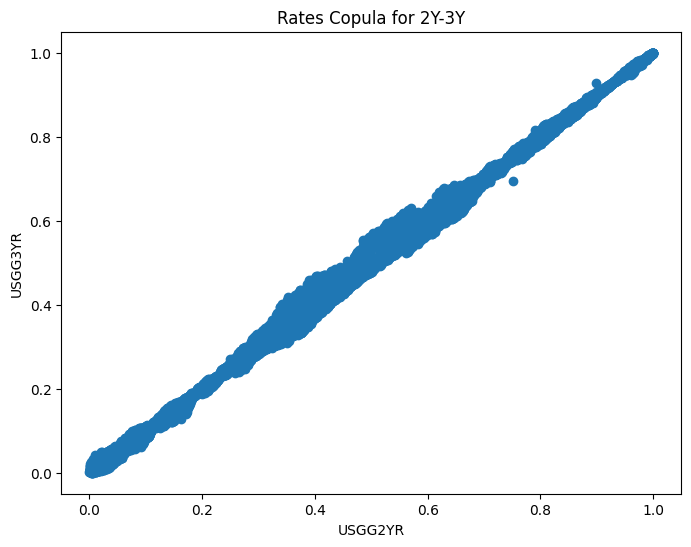

In [66]:
plot_pair(RatesData_ranks_matrix, 2, 3, "Rates Copula for 2Y-3Y")

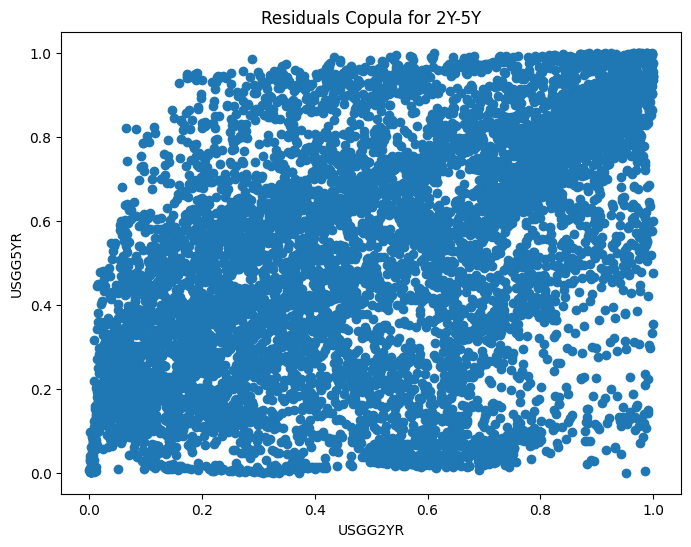

In [67]:
plot_pair(Residual_2_ranks_matrix, 2, 4, "Residuals Copula for 2Y-5Y")

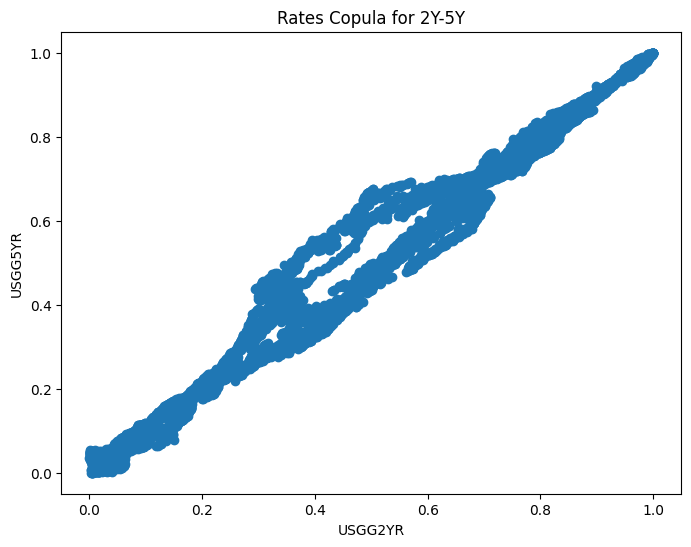

In [68]:
plot_pair(RatesData_ranks_matrix, 2, 4, "Rates Copula for 2Y-5Y")

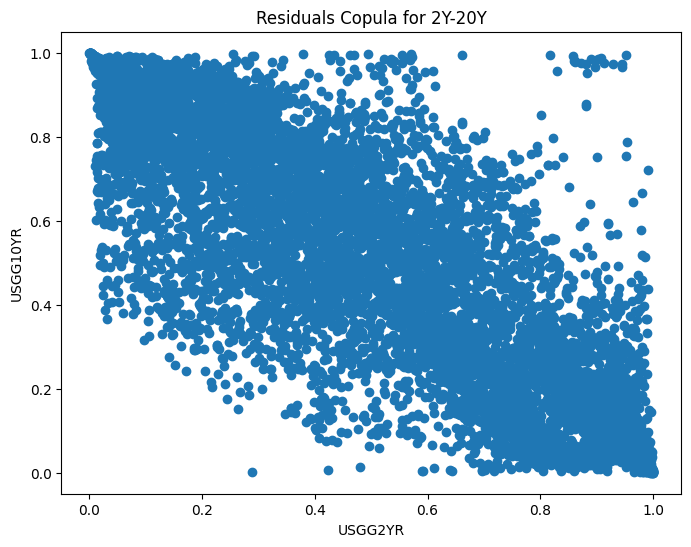

In [69]:
plot_pair(Residual_2_ranks_matrix, 2, 5, "Residuals Copula for 2Y-20Y")

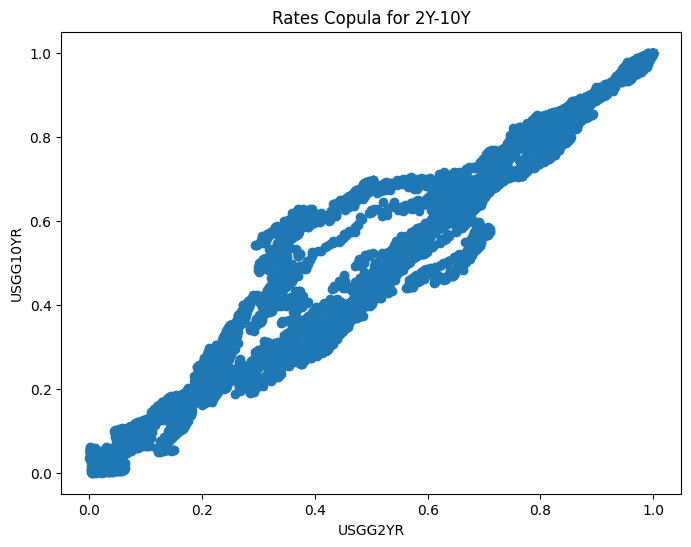

In [70]:
plot_pair(RatesData_ranks_matrix, 2, 5, "Rates Copula for 2Y-10Y")

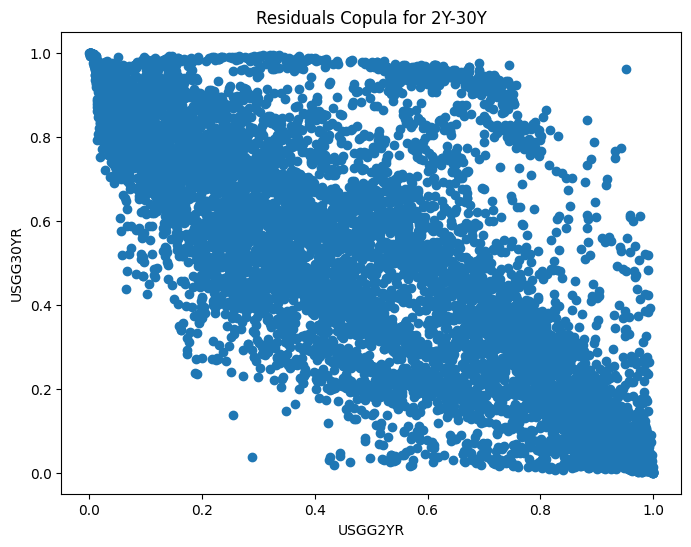

In [71]:
plot_pair(Residual_2_ranks_matrix, 2, 6, "Residuals Copula for 2Y-30Y")

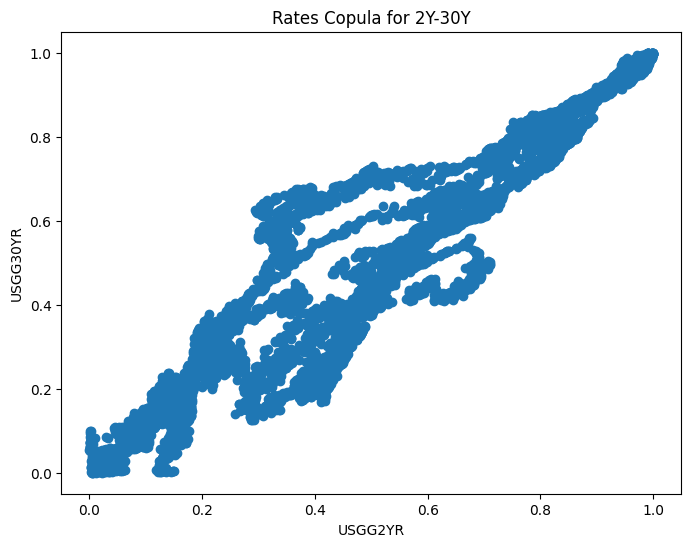

In [72]:
plot_pair(RatesData_ranks_matrix, 2, 6, "Rates Copula for 2Y-30Y")

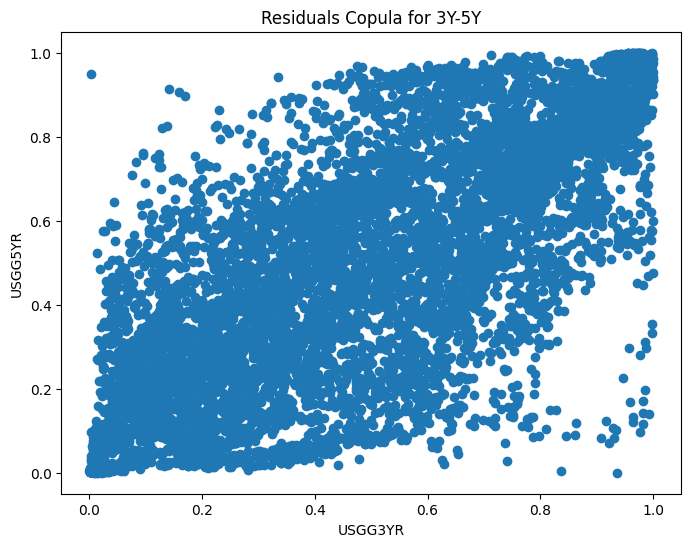

In [73]:
plot_pair(Residual_2_ranks_matrix, 3, 4, "Residuals Copula for 3Y-5Y")

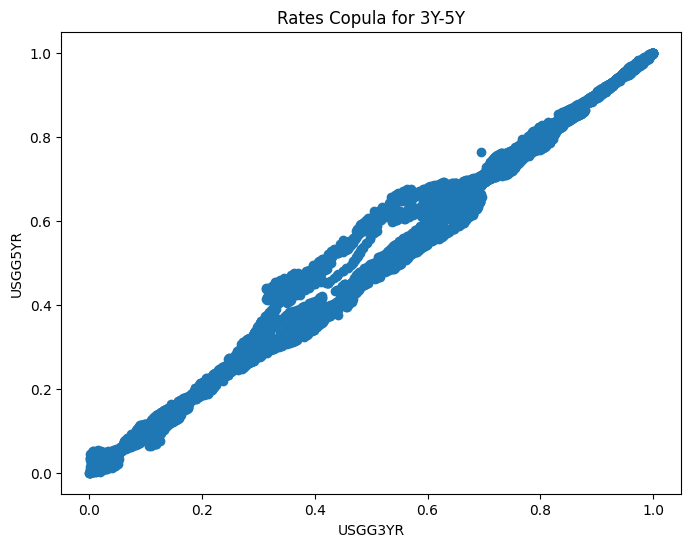

In [74]:
plot_pair(RatesData_ranks_matrix, 3, 4, "Rates Copula for 3Y-5Y")

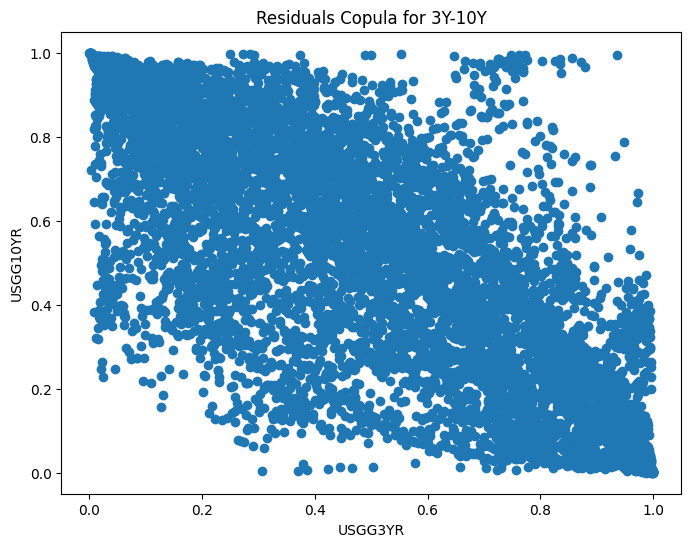

In [75]:
plot_pair(Residual_2_ranks_matrix, 3, 5, "Residuals Copula for 3Y-10Y")

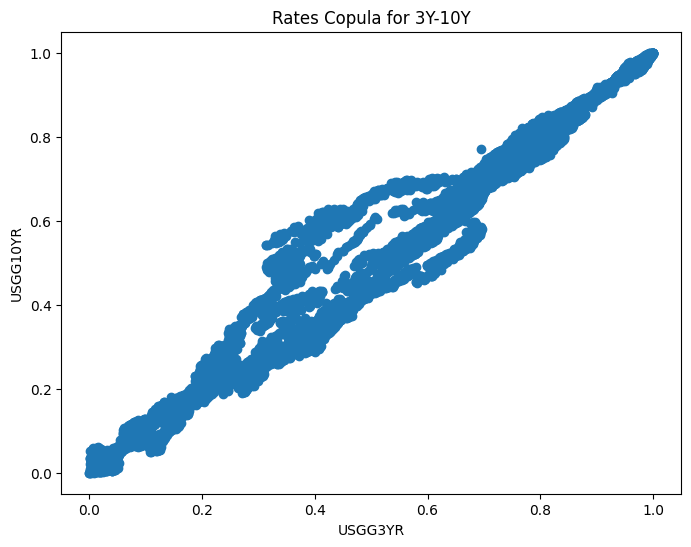

In [76]:
plot_pair(RatesData_ranks_matrix, 3, 5, "Rates Copula for 3Y-10Y")

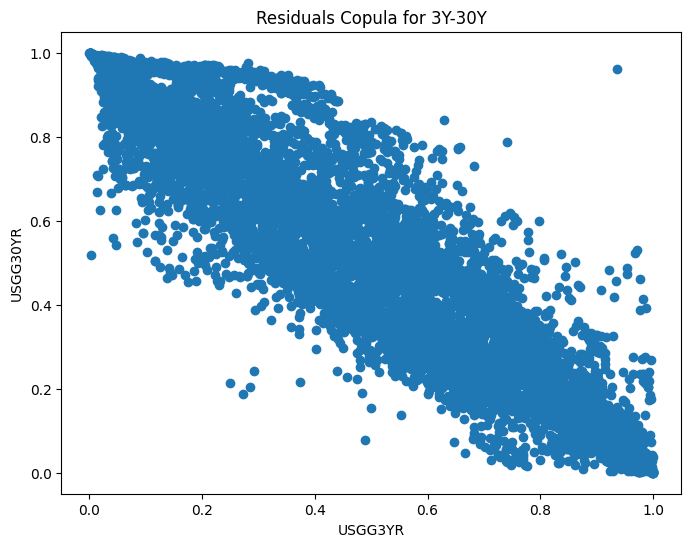

In [77]:
plot_pair(Residual_2_ranks_matrix, 3, 6, "Residuals Copula for 3Y-30Y")

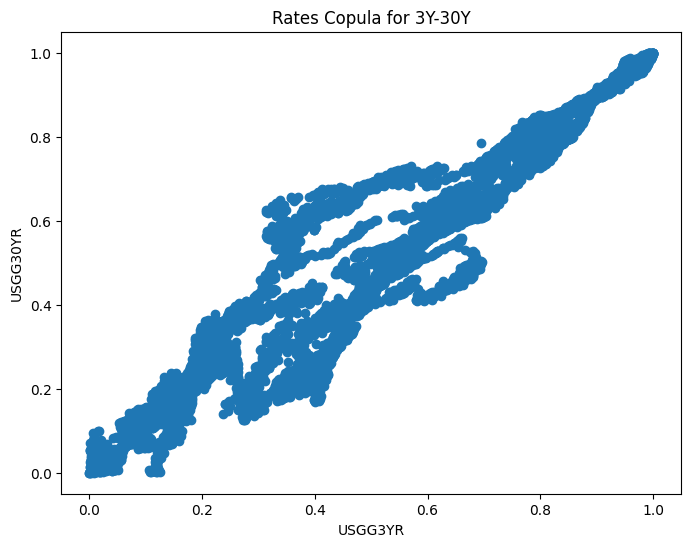

In [78]:
plot_pair(RatesData_ranks_matrix, 3, 6, "Rates Copula for 3Y-30Y")

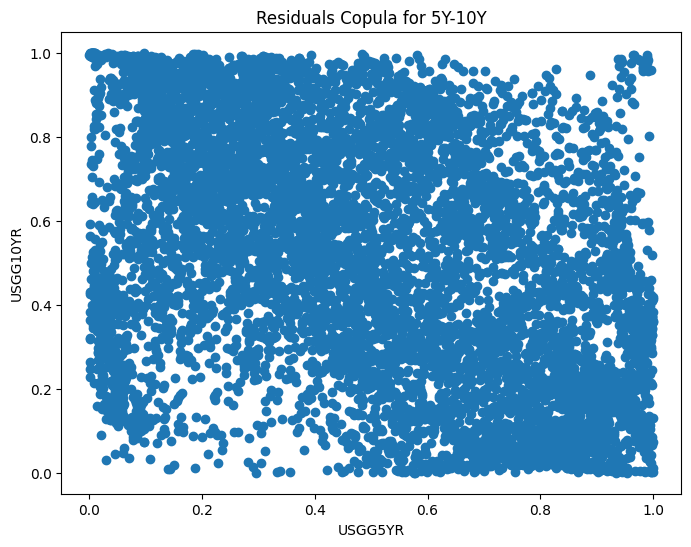

In [79]:
plot_pair(Residual_2_ranks_matrix, 4, 5, "Residuals Copula for 5Y-10Y")

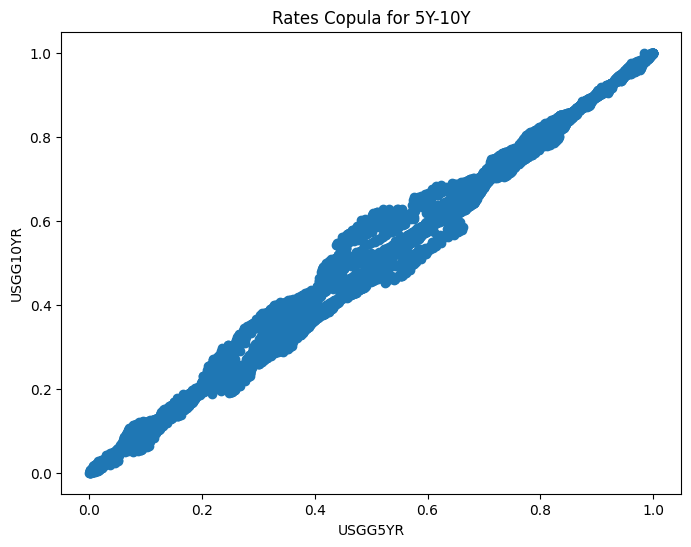

In [80]:
plot_pair(RatesData_ranks_matrix, 4, 5, "Rates Copula for 5Y-10Y")

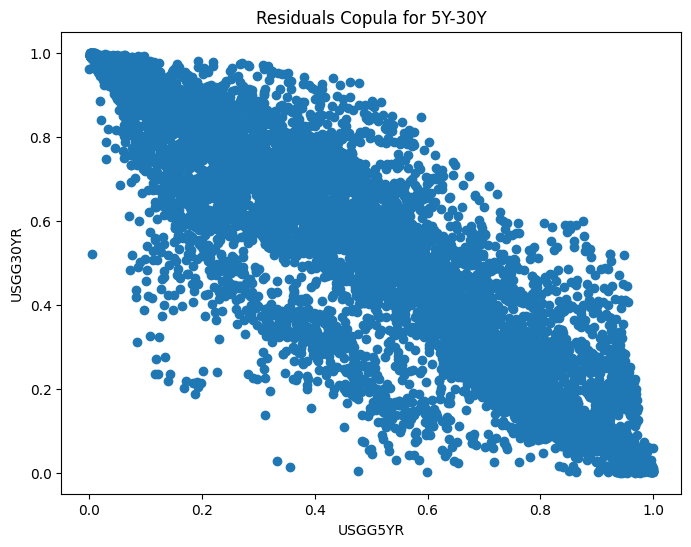

In [81]:
plot_pair(Residual_2_ranks_matrix, 4, 6, "Residuals Copula for 5Y-30Y")

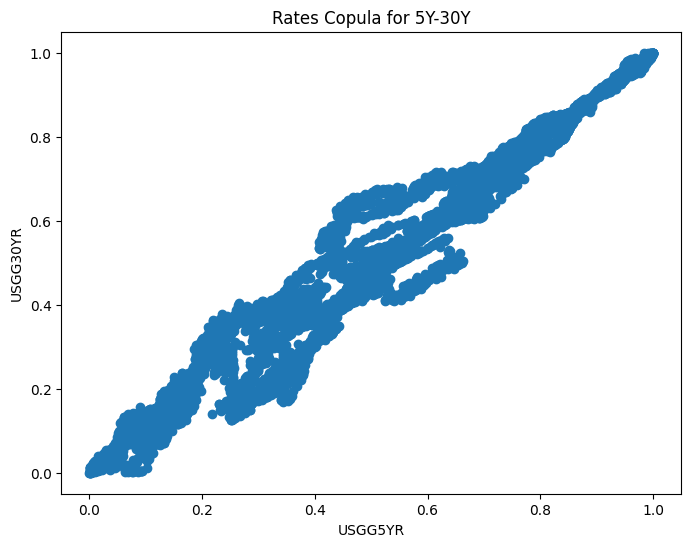

In [82]:
plot_pair(RatesData_ranks_matrix, 4, 6, "Rates Copula for 5Y-30Y")

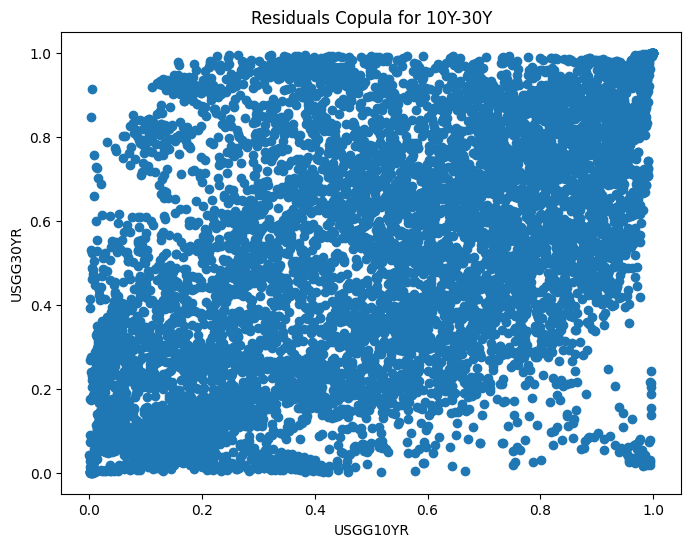

In [83]:
plot_pair(Residual_2_ranks_matrix, 5, 6, "Residuals Copula for 10Y-30Y")

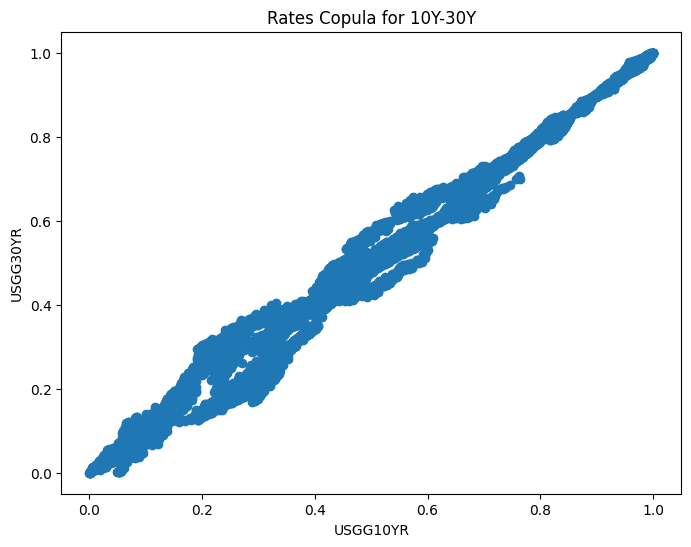

In [84]:
plot_pair(RatesData_ranks_matrix, 5, 6, "Rates Copula for 10Y-30Y")